# 1.Free parameter inference

## Google drive mount 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cd /content/gdrive/My Drive

In [ ]:
ls

In [ ]:
cd XPS

In [ ]:
ls

# 주피터노트북에서는 여기서부터 시작하시면 됩니다!

## P3HT_S2p Data Visualization

### Data load and plotting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

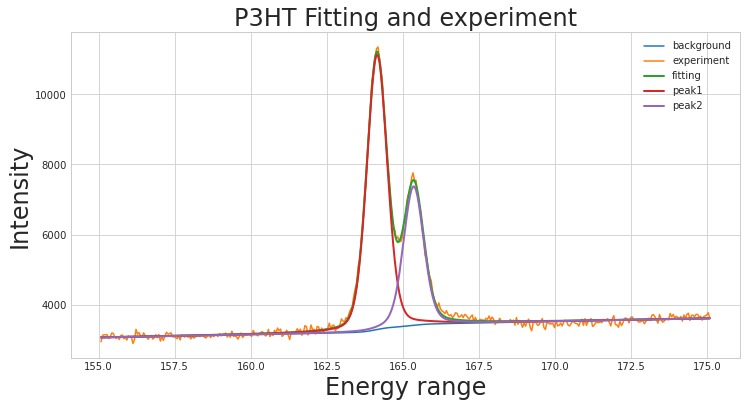

In [ ]:
plt.figure(figsize = (12, 6))

plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [ ]:
# 실험 데이터의 grid number 파악하기
print(bg[:, 0].shape)
print(exp[:, 0].shape)
print(fitting[:, 0].shape)
print(peak1[:, 0].shape)
print(peak2[:, 0].shape)

# Background 제거
reduced_exp = exp[:, 1] - bg[:, 1]
reduced_peak1 = peak1[:, 1] - bg[:, 1]
reduced_peak2 = peak2[:, 1] - bg[:, 1]

# 실험 데이터의 범위 파악
print("XPS exp 최소값: {},  최대값: {}".format(reduced_exp.min(), reduced_exp.max()))
print("XPS peak1 최소값: {},  최대값: {}".format(reduced_peak1.min(), reduced_peak1.max()))
print("XPS peak2 최소값: {},  최대값: {}".format(reduced_peak2.min(), reduced_peak2.max()))


(401,)
(401,)
(600,)
(401,)
(401,)
XPS exp 최소값: -257.34102742614186,  최대값: 8062.741706161443
XPS peak1 최소값: 2.3131095757403273,  최대값: 7841.498304700606
XPS peak2 최소값: 1.3009478766489337,  최대값: 3965.7549875173377


### P3HT-Peak1

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 164.15
    x1 = 164.13
    w = 0.789
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[ 5.08563648e-01 -4.44264315e-01  7.92940661e+03]


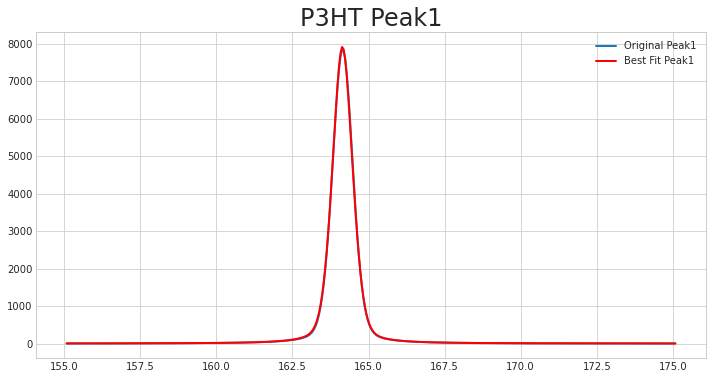

In [ ]:
from scipy.optimize import curve_fit

initial_guess = [1.1, 0.587, 8000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("P3HT Peak1", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### P3HT-Peak2

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 165.35
    x1 = 165.36
    w = 0.786
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09599989e-01 4.41623090e-01 4.01031417e+03]


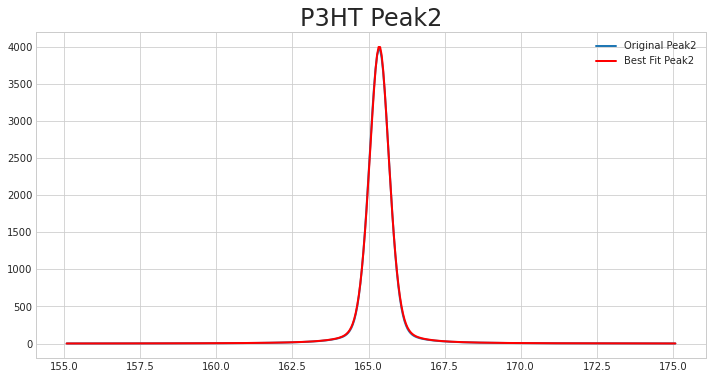

In [ ]:
initial_guess = [4.1, 0.787, 3500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:, 0], voigt(peak2[:, 0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)
plt.title("P3HT Peak2", size = 24)
plt.legend()
plt.grid(True)
plt.show();

## ITO_01s Data Visualizaton

### Data load and plotting

In [ ]:
# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

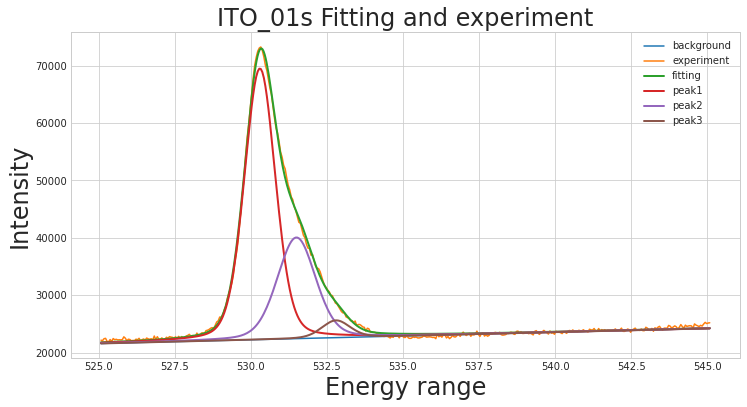

In [ ]:
# Plotting data
plt.figure(figsize = (12, 6))
plt.plot(bg[:, 0], bg[:, 1], label = "background")
plt.plot(exp[:, 0], exp[:, 1], label = "experiment")
plt.plot(fitting[:, 0], fitting[:, 1], label = "fitting", linewidth = 2)
plt.plot(peak1[:, 0], peak1[:, 1], label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], peak2[:, 1], label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], peak3[:, 1], label = "peak3", linewidth = 2)

plt.grid(True)
plt.title("ITO_01s Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

In [ ]:
# 실험 데이터의 Grid number 파악
print(bg[:, 0].shape)
print(exp[:, 0].shape)
print(fitting[:, 0].shape)
print(peak1[:, 0].shape)
print(peak2[:, 0].shape)
print(peak3[:, 0].shape)

# Background 제거
reduced_exp = (exp[:, 1] - bg[:, 1])
#reduced_fit = (fitting[:, 1] - bg[:, 1]) 
reduced_peak1 = (peak1[:, 1] - bg[:, 1])
reduced_peak2 = (peak2[:, 1] - bg[:, 1])
reduced_peak3 = (peak3[:, 1] - bg[:, 1])

# 실험 데이터의 범위 파악
print("XPS exp 최소값: {},  최대값: {}".format(reduced_exp.min(), reduced_exp.max()))
#print(reduced_fit.min(), reduced_fit.max())
print("XPS peak1 최소값: {},  최대값: {}".format(reduced_peak1.min(), reduced_peak1.max()))
print("XPS peak2 최소값: {},  최대값: {}".format(reduced_peak2.min(), reduced_peak2.max()))
print("XPS peak3 최소값: {},  최대값: {}".format(reduced_peak3.min(), reduced_peak3.max()))

(401,)
(401,)
(600,)
(401,)
(401,)
(401,)
XPS exp 최소값: -659.0581009918606,  최대값: 50997.315899628484
XPS peak1 최소값: 17.59834339318695,  최대값: 47217.52315118213
XPS peak2 최소값: 11.877135515947884,  최대값: 17624.715464385725
XPS peak3 최소값: 1.3522435990598751,  최대값: 3007.1755983841613


### ITO-Peak1

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))

def voigt(x, beta, gamma, amp):
    x0 = 530.3
    x1 = 530.29
    w = 1.199
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09791537e-01 4.41140472e-01 4.76944215e+04]


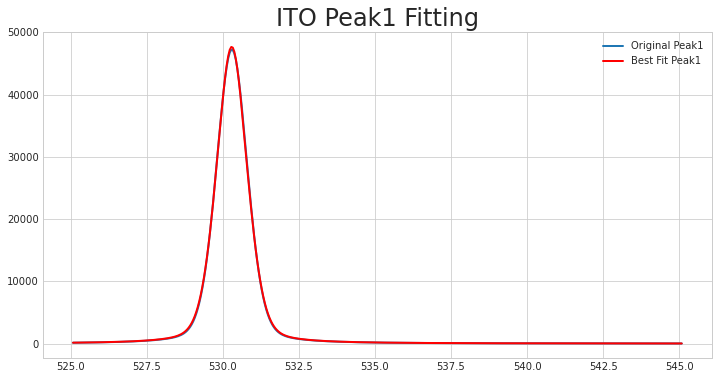

In [ ]:
initial_guess = [1.2, 0.2, 45000 ] 
popt, pcov = curve_fit(voigt, peak1[:,0], peak1[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak1[:, 0], peak1[:, 1] - bg[:, 1], label = "Original Peak1", linewidth=2) # background removed
plt.plot(peak1[:,0], voigt(peak1[:,0], *popt), label = "Best Fit Peak1", color='red', linewidth=2)
plt.title("ITO Peak1 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak2

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 531.5
    x1 = 531.49
    w = 1.484
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09500063e-01 4.40710735e-01 1.77975109e+04]


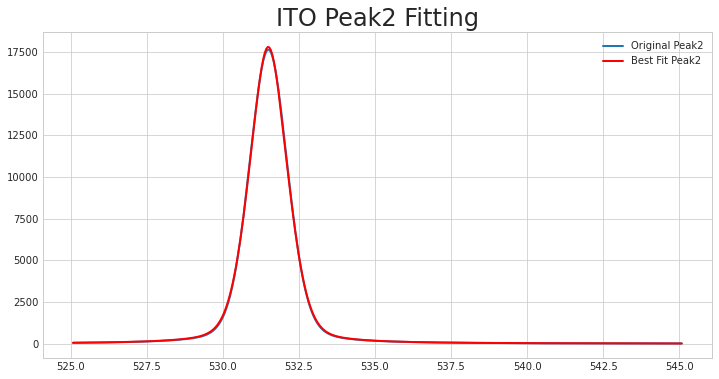

In [ ]:
initial_guess = [0.2, 1.2, 17500 ] 
popt, pcov = curve_fit(voigt, peak2[:,0], peak2[:,1] - bg[:, 1], p0=initial_guess) # background removed
print(popt)


plt.figure(figsize = (12, 6))
plt.plot(peak2[:, 0], peak2[:, 1] - bg[:, 1], label = "Original Peak2", linewidth=2) # background removed
plt.plot(peak2[:,0], voigt(peak2[:,0], *popt), label = "Best Fit Peak2", color='red', linewidth=2)

plt.title("ITO Peak2 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

### ITO-Peak3

In [ ]:
def Gaussian(x, x0, beta, w, amp):
    return amp * (np.exp(-np.log(2) * (x - x0)**2 / (beta*w)**2))

def Lorentzian(x, x1, gamma, w, amp):
    return amp* (1 / (1 + (x - x1)**2 / (gamma*w)**2))
    
def voigt(x, beta, gamma, amp):
    x0 = 532.8
    x1 = 532.79
    w = 1.095
    result = amp * (0.7 * Gaussian(x, x0, beta, w, amp=1) + 0.3 * Lorentzian(x, x1, gamma, w, amp=1))
    return result

[5.09789031e-01 4.41127626e-01 3.03808246e+03]


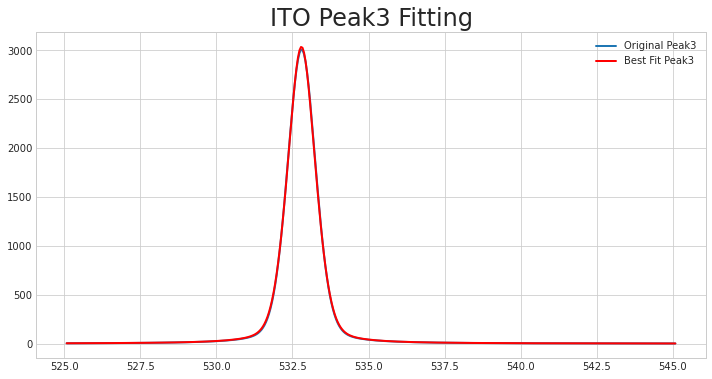

In [ ]:
initial_guess = [0.2, 1.2, 3500 ] 
popt, pcov = curve_fit(voigt, peak3[:,0], peak3[:,1] - bg[:, 1], p0 = initial_guess)
print(popt)

plt.figure(figsize = (12, 6))
plt.plot(peak3[:, 0], peak3[:, 1] - bg[:, 1], label = "Original Peak3", linewidth=2)
plt.plot(peak3[:,0], voigt(peak3[:,0], *popt), label = "Best Fit Peak3", color='red', linewidth=2)

plt.title("ITO Peak3 Fitting", size = 24)
plt.legend()
plt.grid(True)
plt.show();

In [ ]:
# 모두 거의 같음! 확인 ㅎㅎㅎ
# 값을 정밀하게 입력하지 않으면 오차가 커지는 것이었다!

#[5.08563648e-01 -4.44264315e-01  7.92940661e+03]
#[5.10542151e-01 4.39291707e-01 4.01018290e+03]

#[5.09791537e-01 4.41140472e-01 4.76944215e+04]
#[5.09500063e-01 4.40710735e-01 1.77975109e+04]
#[5.09789031e-01 4.41127626e-01 3.03808246e+03]

# 2.Machine Learning Start!

## Data Generation

In [ ]:
# ========== Library import ==========
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect
plt.style.use(["seaborn-whitegrid"])

# ========== Parameter Matrix generation ==========
N = 5  # Maximum number of the possible peak
Data_size = 5000000

# Set of Parameters ready
Parameters = np.zeros((Data_size, N, 3)) 
print(Parameters.shape)

(5000000, 5, 3)


In [ ]:
# Now we use the new model funtion : 
# voigt function = linear combination of Gaussian and Lorentzian function with some ratio 0.3

def voigt_noise(x, *args, beta = 5.09791537e-01, gamma=4.41140472e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

        
    for xx in range(len(result)):
        result[xx] += 0.01* ((np.random.rand()*2) - 1)

    return result 
    

    
def voigt(x, *args, beta = 5.09791537e-01, gamma=4.41140472e-01):
    """ it takes an x-domain and parameter list as an input, and give voigt function graph as an output."""
    amp = args[::3]
    center = args[1::3]
    width = args[2::3]
    
    result = 0
    for i in range(len(center)):
        result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))

    return result 
    
    

In [ ]:
# ========== x-domain range ==========
x = np.linspace(0, 15, 401) 
print(len(x))


401


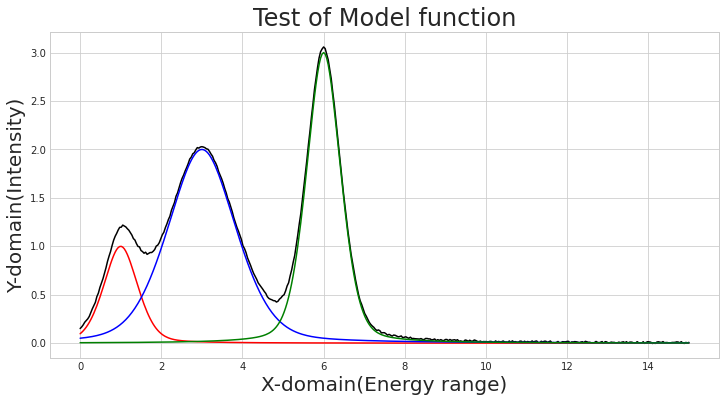

In [ ]:
# ========== Checking out of the voigt function ==========
params = [1, 1, 1, 2, 3, 2, 3, 6, 1]

plt.figure(figsize = (12, 6))
plt.plot(x, voigt_noise(x, *params), color = 'black')

plt.plot(x, voigt(x, *params[:3]), color = 'red')
plt.plot(x, voigt(x, *params[3:6]), color = 'blue')
plt.plot(x, voigt(x, *params[6:]), color = 'green')

plt.title("Test of Model function", size = 24)
plt.xlabel("X-domain(Energy range)", size = 20)
plt.ylabel("Y-domain(Intensity)", size = 20)
plt.grid(True)
plt.show()

In [ ]:
# ========== Generation of Voigt function Parameters with Matrix Form ==========

for i in range(len(Parameters)): # For each matrix in Parameter set..
    for j in range(Parameters.shape[1]): # For each row in each matrix..
        
        # append three arguments that will be used in Voigt function

        center1 = 7 +  (0.6*np.random.rand() - 0.3)
        center2 = 8 +  (0.6*np.random.rand() - 0.3)    #6.1 ~ 7.9
        center3 = 9 +  (0.6*np.random.rand() - 0.3)    #8.1 ~ 9.9
        center4 = 10 + (0.6*np.random.rand() - 0.3)
        center5 = 11 + (0.6*np.random.rand() - 0.3)
        
        #                                amplitude      center        width
        Parameters[i][0] = np.array([[np.random.rand(), center1, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][1] = np.array([[np.random.rand(), center2, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][2] = np.array([[np.random.rand(), center3, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][3] = np.array([[np.random.rand(), center4, 0.7 + 0.8*np.random.rand() ]])
        Parameters[i][4] = np.array([[np.random.rand(), center5, 0.7 + 0.8*np.random.rand() ]])

        
# Check out
print(Parameters)  

[[[2.57028666e-02 6.94916621e+00 1.39887123e+00]
  [4.16570633e-01 8.16720501e+00 1.26877170e+00]
  [3.58923914e-01 8.81696271e+00 8.01748809e-01]
  [7.32140925e-01 1.00277050e+01 8.44738800e-01]
  [7.59646791e-01 1.09436573e+01 1.02828361e+00]]

 [[8.40672498e-01 7.28987699e+00 8.01548773e-01]
  [5.49307906e-01 8.06659928e+00 1.44591400e+00]
  [2.12062268e-01 9.27579242e+00 1.07899551e+00]
  [9.66164261e-01 1.00091204e+01 7.79962532e-01]
  [9.56474534e-01 1.10585691e+01 8.82770697e-01]]

 [[7.34007646e-01 7.19469731e+00 1.28233856e+00]
  [4.11247531e-01 7.82455631e+00 1.34202634e+00]
  [9.93867731e-01 8.71828371e+00 1.03779546e+00]
  [8.89150675e-01 9.95934676e+00 9.53948482e-01]
  [5.08928031e-02 1.07177460e+01 1.47585867e+00]]

 ...

 [[8.95067533e-02 6.94453916e+00 1.39196156e+00]
  [6.73392026e-01 7.91445065e+00 1.42321172e+00]
  [3.38888977e-01 8.92405173e+00 9.37131789e-01]
  [3.30724919e-01 9.96640402e+00 1.37432722e+00]
  [2.62657077e-01 1.07714673e+01 7.26340658e-01]]

 [[2.7

In [ ]:
# ========== Data Generation ==========

GRAPH = []     # y-value of the Voigt function
AREA = []      # Area of the Voigt funtion
NUM_PEAK = []  # Number of peak
AMPLITUDE = [] # Amplitude
CENTER = []    # Center
WIDTH = []     # Width

for j in Parameters:

    peak = random.randint(2, 5)  # Random selection of Possible peak number
    j = list(j.reshape((3*N, ))) # reshaping to put it as *args

    # Appending to list
    GRAPH.append(voigt_noise(x, *j[0:3*peak]))
    AREA.append(sum(voigt(x, *j[0:3*peak])))
    NUM_PEAK.append(peak)
    AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[0]))
    CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[0]))
    WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[0]))
    

In [ ]:
# ========== Conversion to Numpy.array ==========
GRAPH = np.array(GRAPH)
AREA = np.array(AREA)
NUM_PEAK = np.array(NUM_PEAK)
AMPLITUDE = np.array(AMPLITUDE)
CENTER = np.array(CENTER)
WIDTH = np.array(WIDTH)

# ========== Checking out the shape ==========
print(GRAPH.shape)
print(AREA.shape)
print(NUM_PEAK.shape)
print(AMPLITUDE.shape)
print(CENTER.shape)
print(WIDTH.shape)

(5000000, 401)
(5000000,)
(5000000,)
(5000000, 5)
(5000000, 5)
(5000000, 5)


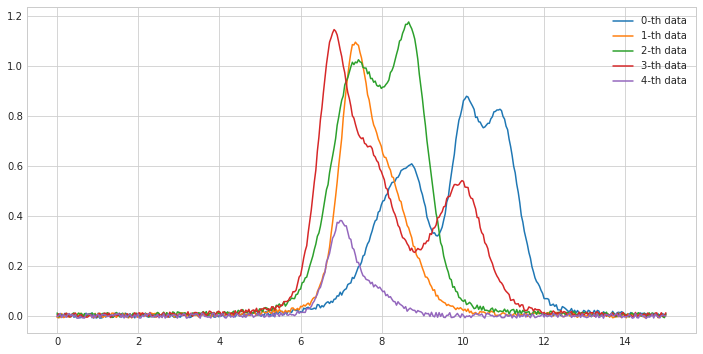

In [ ]:
# ========== Generated Data sample check ==========
plt.figure(figsize = (12, 6))

for i in range(5):
    plt.plot(x, GRAPH[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid(True)

In [ ]:
# ========== Data spliting up into three group ==========
# ========== Training / Validation / Test ==========

# lorentzian graph
train_graph = np.array(GRAPH[:4800000])
val_graph   = np.array(GRAPH[4800000:4950000])
test_graph  = np.array(GRAPH[4950000:])

# area label
train_area = np.array(AREA[:4800000])
val_area   = np.array(AREA[4800000:4950000])
test_area  = np.array(AREA[4950000:])

# number of peak label
train_num_peak = np.array(NUM_PEAK[:4800000])
val_num_peak   = np.array(NUM_PEAK[4800000:4950000])
test_num_peak  = np.array(NUM_PEAK[4950000:])

# amplitude label
train_amp = np.array(AMPLITUDE[:4800000])
val_amp   = np.array(AMPLITUDE[4800000:4950000])
test_amp  = np.array(AMPLITUDE[4950000:])

# center label
train_center = np.array(CENTER[:4800000])
val_center   = np.array(CENTER[4800000:4950000])
test_center  = np.array(CENTER[4950000:])

# width label
train_width = np.array(WIDTH[:4800000])
val_width   = np.array(WIDTH[4800000:4950000])
test_width  = np.array(WIDTH[4950000:])

In [ ]:
# ========== Size check ==========
print(train_graph.shape, train_area.shape, train_num_peak.shape, 
      train_amp.shape, train_center.shape, train_width.shape)
print(val_graph.shape, val_area.shape, val_num_peak.shape, 
      val_amp.shape, val_center.shape, val_width.shape)
print(test_graph.shape, test_area.shape, test_num_peak.shape, 
      test_amp.shape, test_center.shape, test_width.shape)


(4800000, 401) (4800000,) (4800000,) (4800000, 5) (4800000, 5) (4800000, 5)
(150000, 401) (150000,) (150000,) (150000, 5) (150000, 5) (150000, 5)
(50000, 401) (50000,) (50000,) (50000, 5) (50000, 5) (50000, 5)


In [ ]:
# ========== reshape for Image-from setting ==========
# 1차원 그래프 변환

train_graph = train_graph.reshape(4800000, len(x), 1)
val_graph   = val_graph.reshape(150000, len(x), 1)
test_graph  = test_graph.reshape(50000, len(x), 1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(4800000, 401, 1)
(150000, 401, 1)
(50000, 401, 1)


## 2. Functional API를 활용한 비계층적 구조 신경망 작성

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 302, 32)      3232        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 151, 32)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 102, 16)      25616       max_pooling1d[0][0]              
______________________________________________________________________________________________

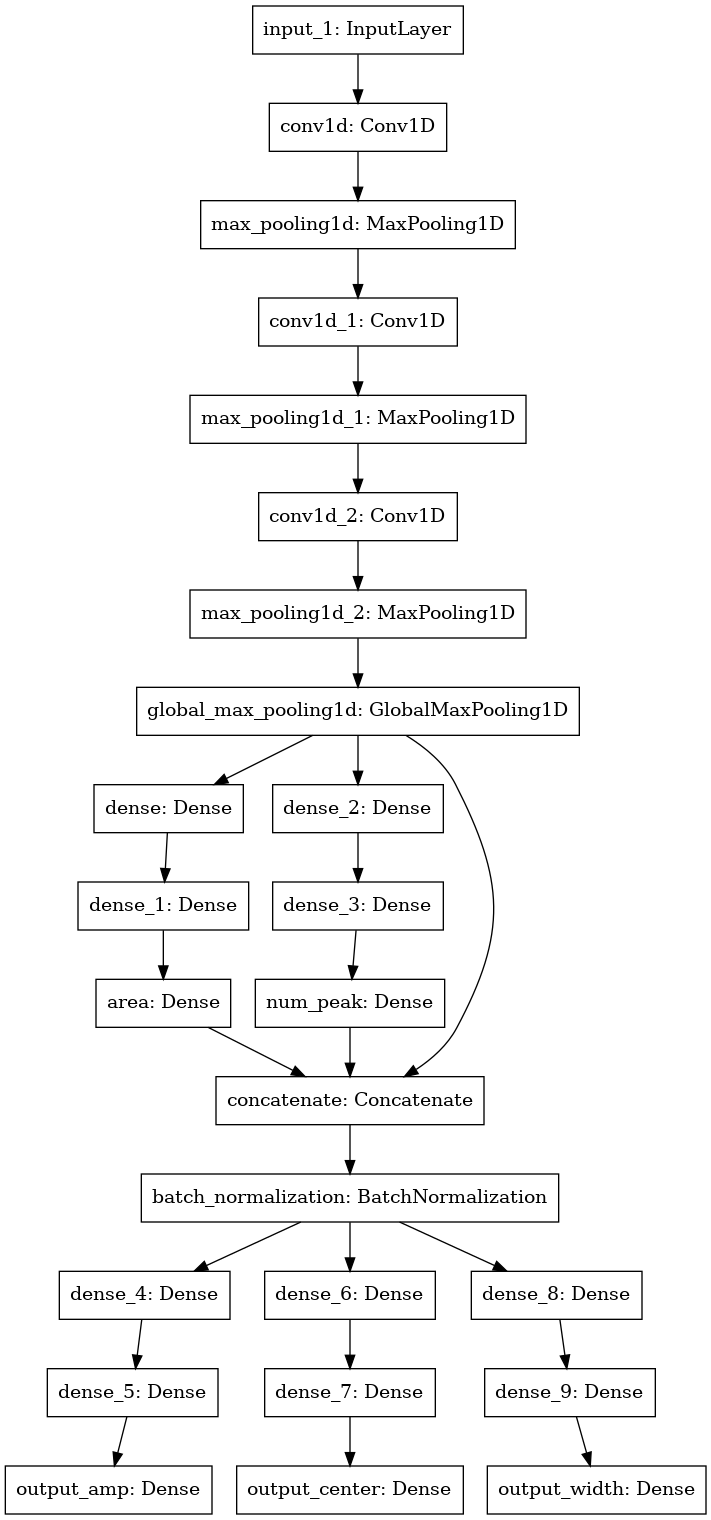

In [ ]:
# 최대한 간단한 구조로 만들기!

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape = (len(x), 1))
#main_inputs2 = BatchNormalization()(main_inputs)

# At least three Convolution layer is needed => other paper
# Adding BatchNormalization layer => we expect the effect of regularization
x_conv1 = Conv1D(32, kernel_size = 100, activation = 'relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size = 2)(x_conv1)

x_conv2 = Conv1D(16, kernel_size = 50, activation = 'relu')(x_pooling1)
x_pooling2 = MaxPooling1D(pool_size = 2)(x_conv2)

x_conv3 = Conv1D(16, kernel_size = 25, activation = 'relu')(x_pooling2)
x_pooling3 = MaxPooling1D(pool_size = 2)(x_conv3)

x_GMpooling = GlobalMaxPooling1D()(x_pooling3)


# output : area
hidden_area1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_area2 = Dense(50, activation = 'relu')(hidden_area1)
output_area = Dense(1, activation = 'linear', name = 'area')(hidden_area2)


# output : number of peak
hidden_num_peak1 = Dense(100, activation = 'relu')(x_GMpooling)
hidden_num_peak2 = Dense(50, activation = 'relu')(hidden_num_peak1)
output_num_peak = Dense(1, activation = 'linear', name = 'num_peak')(hidden_num_peak2)


# merging features into one layer
merge = concatenate([output_area, output_num_peak, x_GMpooling])
merge2 = BatchNormalization()(merge)


# prediction output
hidden_amp1 = Dense(100, activation = 'relu')(merge2)
hidden_amp2 = Dense(100, activation = 'relu')(hidden_amp1)
output_amp = Dense(N, activation = 'linear', name = 'output_amp')(hidden_amp2)

hidden_center1 = Dense(100, activation = 'relu')(merge2)
hidden_center2 = Dense(100, activation = 'relu')(hidden_center1)
output_center = Dense(N, activation = 'linear', name = 'output_center')(hidden_center2)

hidden_width1 = Dense(100, activation = 'relu')(merge2)
hidden_width2 = Dense(100, activation = 'relu')(hidden_width1)
output_width = Dense(N, activation = 'linear', name = 'output_width')(hidden_width2)



# Definition of model with out input, five output
model = Model(inputs = main_inputs,
              outputs = [output_area, output_num_peak, output_amp, output_center, output_width])

# Summarize layers
print(model.summary())
# plot graph
plot_model(model)

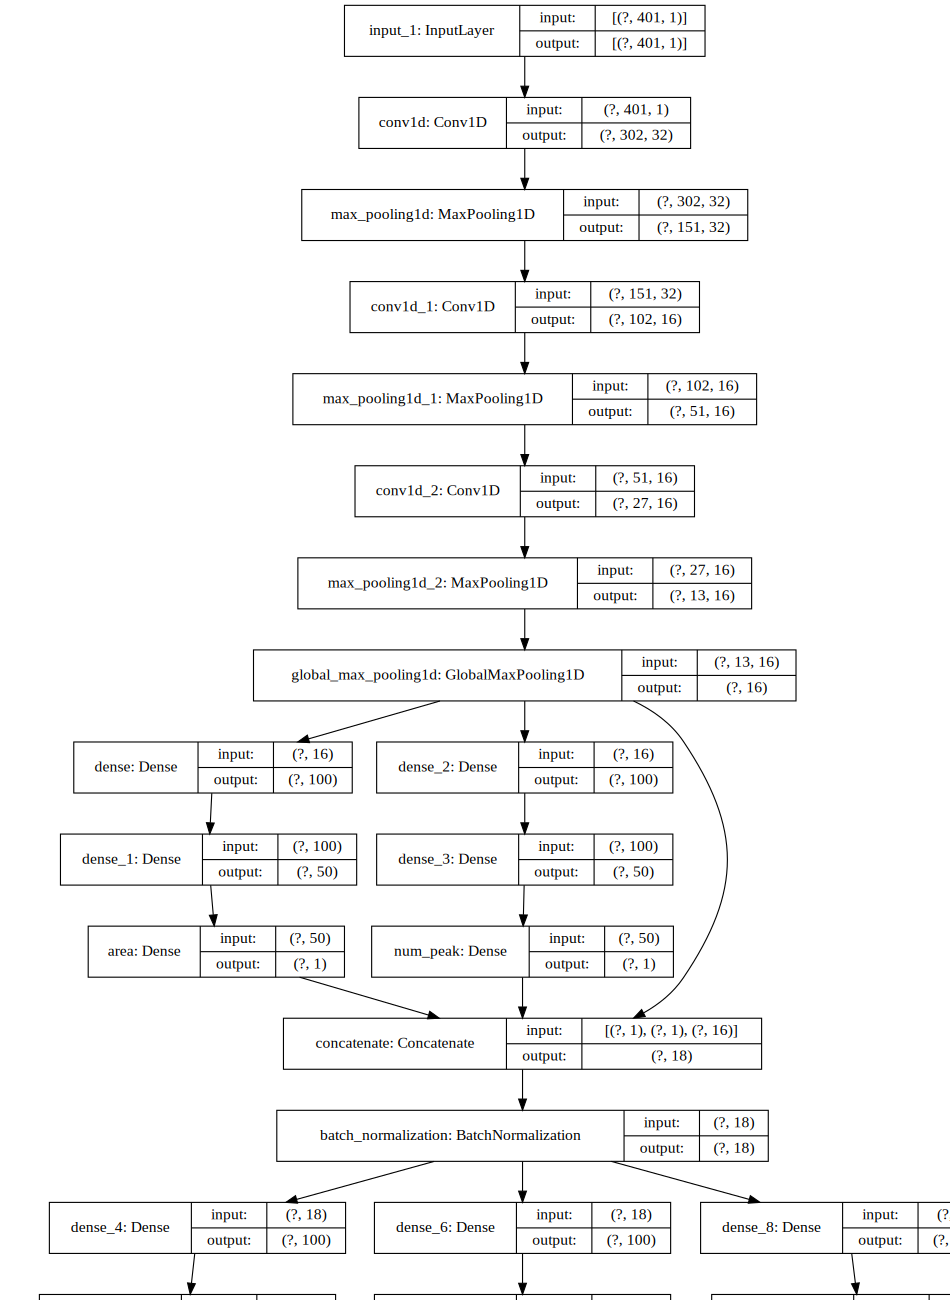

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes = True, expand_nested = True,
                 dpi = 65).create(prog = 'dot', format = 'svg'))


In [ ]:
# 학습방법 설정
model.compile(loss = ['mse', 'mse', 'mse', 'mse', 'mse'],
              metrics = ['mae'], 
              optimizer = 'adam')


In [ ]:
# 이 부분에서 콜백 함수에 넣을 콜백리스트 정의할 것!
import keras

callbacks_list = [
    # 조기종료 콜백함수 : val loss 감시, 10에폭까지 기다림
    #keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
    
    # 모델 체크포인트 콜백함수 : 모델을 h5로 저장, 최적 모델만을 저장
    keras.callbacks.ModelCheckpoint(filepath = "LAST_CODE_Model_4.h5", monitor = 'val_loss', save_best_only = True),
    
    # 학습률 감소 콜백함수 : val loss 감시, 검증 손실 향상안될때 10분의 1감소시킴
    keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 10)
]




In [ ]:
%%time
hist = model.fit(train_graph, [train_area, train_num_peak, train_amp, train_center, train_width],
                 epochs = 85,
                 batch_size = 5000,
                 callbacks = callbacks_list,
                 validation_data = (val_graph, [val_area, val_num_peak, val_amp, val_center, val_width]),
                 verbose = 2)



Epoch 1/85
960/960 - 35s - loss: 72.9656 - area_loss: 66.8152 - num_peak_loss: 1.0895 - output_amp_loss: 0.0375 - output_center_loss: 4.9366 - output_width_loss: 0.0871 - area_mae: 2.4218 - num_peak_mae: 0.6977 - output_amp_mae: 0.1374 - output_center_mae: 1.1422 - output_width_mae: 0.2115 - val_loss: 4.1209 - val_area_loss: 0.4548 - val_num_peak_loss: 0.2195 - val_output_amp_loss: 0.0361 - val_output_center_loss: 3.3414 - val_output_width_loss: 0.0691 - val_area_mae: 0.4129 - val_num_peak_mae: 0.3832 - val_output_amp_mae: 0.1362 - val_output_center_mae: 0.8579 - val_output_width_mae: 0.1953 - lr: 0.0010
Epoch 2/85
960/960 - 38s - loss: 2.1050 - area_loss: 0.1398 - num_peak_loss: 0.1514 - output_amp_loss: 0.0263 - output_center_loss: 1.7383 - output_width_loss: 0.0492 - area_mae: 0.2441 - num_peak_mae: 0.2979 - output_amp_mae: 0.1124 - output_center_mae: 0.5125 - output_width_mae: 0.1573 - val_loss: 1.7906 - val_area_loss: 0.0737 - val_num_peak_loss: 0.1185 - val_output_amp_loss: 0.031

Epoch 15/85
960/960 - 35s - loss: 0.6501 - area_loss: 0.1535 - num_peak_loss: 0.0538 - output_amp_loss: 0.0165 - output_center_loss: 0.3969 - output_width_loss: 0.0294 - area_mae: 0.2737 - num_peak_mae: 0.1694 - output_amp_mae: 0.0836 - output_center_mae: 0.1867 - output_width_mae: 0.1139 - val_loss: 0.6708 - val_area_loss: 0.1544 - val_num_peak_loss: 0.0445 - val_output_amp_loss: 0.0191 - val_output_center_loss: 0.4230 - val_output_width_loss: 0.0298 - val_area_mae: 0.3394 - val_num_peak_mae: 0.1431 - val_output_amp_mae: 0.0906 - val_output_center_mae: 0.1746 - val_output_width_mae: 0.1126 - lr: 0.0010
Epoch 16/85
960/960 - 35s - loss: 0.6269 - area_loss: 0.1509 - num_peak_loss: 0.0486 - output_amp_loss: 0.0159 - output_center_loss: 0.3825 - output_width_loss: 0.0290 - area_mae: 0.2578 - num_peak_mae: 0.1591 - output_amp_mae: 0.0819 - output_center_mae: 0.1822 - output_width_mae: 0.1128 - val_loss: 0.7429 - val_area_loss: 0.2054 - val_num_peak_loss: 0.0530 - val_output_amp_loss: 0.019

Epoch 29/85
960/960 - 35s - loss: 0.4637 - area_loss: 0.0942 - num_peak_loss: 0.0294 - output_amp_loss: 0.0121 - output_center_loss: 0.3030 - output_width_loss: 0.0251 - area_mae: 0.2066 - num_peak_mae: 0.1119 - output_amp_mae: 0.0705 - output_center_mae: 0.1596 - output_width_mae: 0.1028 - val_loss: 0.6194 - val_area_loss: 0.2054 - val_num_peak_loss: 0.0284 - val_output_amp_loss: 0.0142 - val_output_center_loss: 0.3449 - val_output_width_loss: 0.0265 - val_area_mae: 0.4047 - val_num_peak_mae: 0.0985 - val_output_amp_mae: 0.0763 - val_output_center_mae: 0.1592 - val_output_width_mae: 0.1030 - lr: 0.0010
Epoch 30/85
960/960 - 34s - loss: 0.4641 - area_loss: 0.0974 - num_peak_loss: 0.0295 - output_amp_loss: 0.0118 - output_center_loss: 0.3004 - output_width_loss: 0.0249 - area_mae: 0.2164 - num_peak_mae: 0.1122 - output_amp_mae: 0.0695 - output_center_mae: 0.1598 - output_width_mae: 0.1022 - val_loss: 0.5497 - val_area_loss: 0.1702 - val_num_peak_loss: 0.0268 - val_output_amp_loss: 0.014

Epoch 43/85
960/960 - 34s - loss: 0.3886 - area_loss: 0.0683 - num_peak_loss: 0.0205 - output_amp_loss: 0.0095 - output_center_loss: 0.2678 - output_width_loss: 0.0224 - area_mae: 0.1711 - num_peak_mae: 0.0811 - output_amp_mae: 0.0611 - output_center_mae: 0.1507 - output_width_mae: 0.0950 - val_loss: 0.5227 - val_area_loss: 0.1905 - val_num_peak_loss: 0.0253 - val_output_amp_loss: 0.0105 - val_output_center_loss: 0.2733 - val_output_width_loss: 0.0231 - val_area_mae: 0.3927 - val_num_peak_mae: 0.1007 - val_output_amp_mae: 0.0653 - val_output_center_mae: 0.1504 - val_output_width_mae: 0.0965 - lr: 0.0010
Epoch 44/85
960/960 - 35s - loss: 0.3886 - area_loss: 0.0716 - num_peak_loss: 0.0192 - output_amp_loss: 0.0094 - output_center_loss: 0.2661 - output_width_loss: 0.0222 - area_mae: 0.1855 - num_peak_mae: 0.0757 - output_amp_mae: 0.0607 - output_center_mae: 0.1504 - output_width_mae: 0.0946 - val_loss: 0.3333 - val_area_loss: 0.0219 - val_num_peak_loss: 0.0181 - val_output_amp_loss: 0.014

Epoch 57/85
960/960 - 35s - loss: 0.3506 - area_loss: 0.0532 - num_peak_loss: 0.0149 - output_amp_loss: 0.0085 - output_center_loss: 0.2542 - output_width_loss: 0.0198 - area_mae: 0.1657 - num_peak_mae: 0.0526 - output_amp_mae: 0.0571 - output_center_mae: 0.1464 - output_width_mae: 0.0872 - val_loss: 0.3211 - val_area_loss: 0.0127 - val_num_peak_loss: 0.0161 - val_output_amp_loss: 0.0088 - val_output_center_loss: 0.2635 - val_output_width_loss: 0.0200 - val_area_mae: 0.0886 - val_num_peak_mae: 0.0625 - val_output_amp_mae: 0.0598 - val_output_center_mae: 0.1516 - val_output_width_mae: 0.0881 - lr: 0.0010
Epoch 58/85
960/960 - 34s - loss: 0.3469 - area_loss: 0.0509 - num_peak_loss: 0.0145 - output_amp_loss: 0.0084 - output_center_loss: 0.2534 - output_width_loss: 0.0197 - area_mae: 0.1569 - num_peak_mae: 0.0487 - output_amp_mae: 0.0568 - output_center_mae: 0.1457 - output_width_mae: 0.0868 - val_loss: 0.3105 - val_area_loss: 0.0107 - val_num_peak_loss: 0.0138 - val_output_amp_loss: 0.010

Epoch 71/85
960/960 - 33s - loss: 0.3263 - area_loss: 0.0402 - num_peak_loss: 0.0132 - output_amp_loss: 0.0079 - output_center_loss: 0.2465 - output_width_loss: 0.0185 - area_mae: 0.1473 - num_peak_mae: 0.0402 - output_amp_mae: 0.0548 - output_center_mae: 0.1426 - output_width_mae: 0.0831 - val_loss: 0.3109 - val_area_loss: 0.0229 - val_num_peak_loss: 0.0127 - val_output_amp_loss: 0.0081 - val_output_center_loss: 0.2486 - val_output_width_loss: 0.0186 - val_area_mae: 0.1192 - val_num_peak_mae: 0.0415 - val_output_amp_mae: 0.0563 - val_output_center_mae: 0.1463 - val_output_width_mae: 0.0839 - lr: 0.0010
Epoch 72/85
960/960 - 34s - loss: 0.3267 - area_loss: 0.0404 - num_peak_loss: 0.0133 - output_amp_loss: 0.0078 - output_center_loss: 0.2467 - output_width_loss: 0.0185 - area_mae: 0.1498 - num_peak_mae: 0.0415 - output_amp_mae: 0.0546 - output_center_mae: 0.1422 - output_width_mae: 0.0832 - val_loss: 0.3009 - val_area_loss: 0.0120 - val_num_peak_loss: 0.0130 - val_output_amp_loss: 0.008

Epoch 85/85
960/960 - 34s - loss: 0.3186 - area_loss: 0.0379 - num_peak_loss: 0.0128 - output_amp_loss: 0.0075 - output_center_loss: 0.2427 - output_width_loss: 0.0177 - area_mae: 0.1402 - num_peak_mae: 0.0377 - output_amp_mae: 0.0536 - output_center_mae: 0.1402 - output_width_mae: 0.0810 - val_loss: 0.3018 - val_area_loss: 0.0168 - val_num_peak_loss: 0.0127 - val_output_amp_loss: 0.0083 - val_output_center_loss: 0.2454 - val_output_width_loss: 0.0186 - val_area_mae: 0.1029 - val_num_peak_mae: 0.0468 - val_output_amp_mae: 0.0577 - val_output_center_mae: 0.1376 - val_output_width_mae: 0.0842 - lr: 0.0010
CPU times: user 1h 26min 52s, sys: 1h 43min 9s, total: 3h 10min 2s
Wall time: 49min 6s


In [ ]:
for key in hist.history.keys():
    print(key)  # list of every loss function names

loss
area_loss
num_peak_loss
output_amp_loss
output_center_loss
output_width_loss
area_mae
num_peak_mae
output_amp_mae
output_center_mae
output_width_mae
val_loss
val_area_loss
val_num_peak_loss
val_output_amp_loss
val_output_center_loss
val_output_width_loss
val_area_mae
val_num_peak_mae
val_output_amp_mae
val_output_center_mae
val_output_width_mae
lr


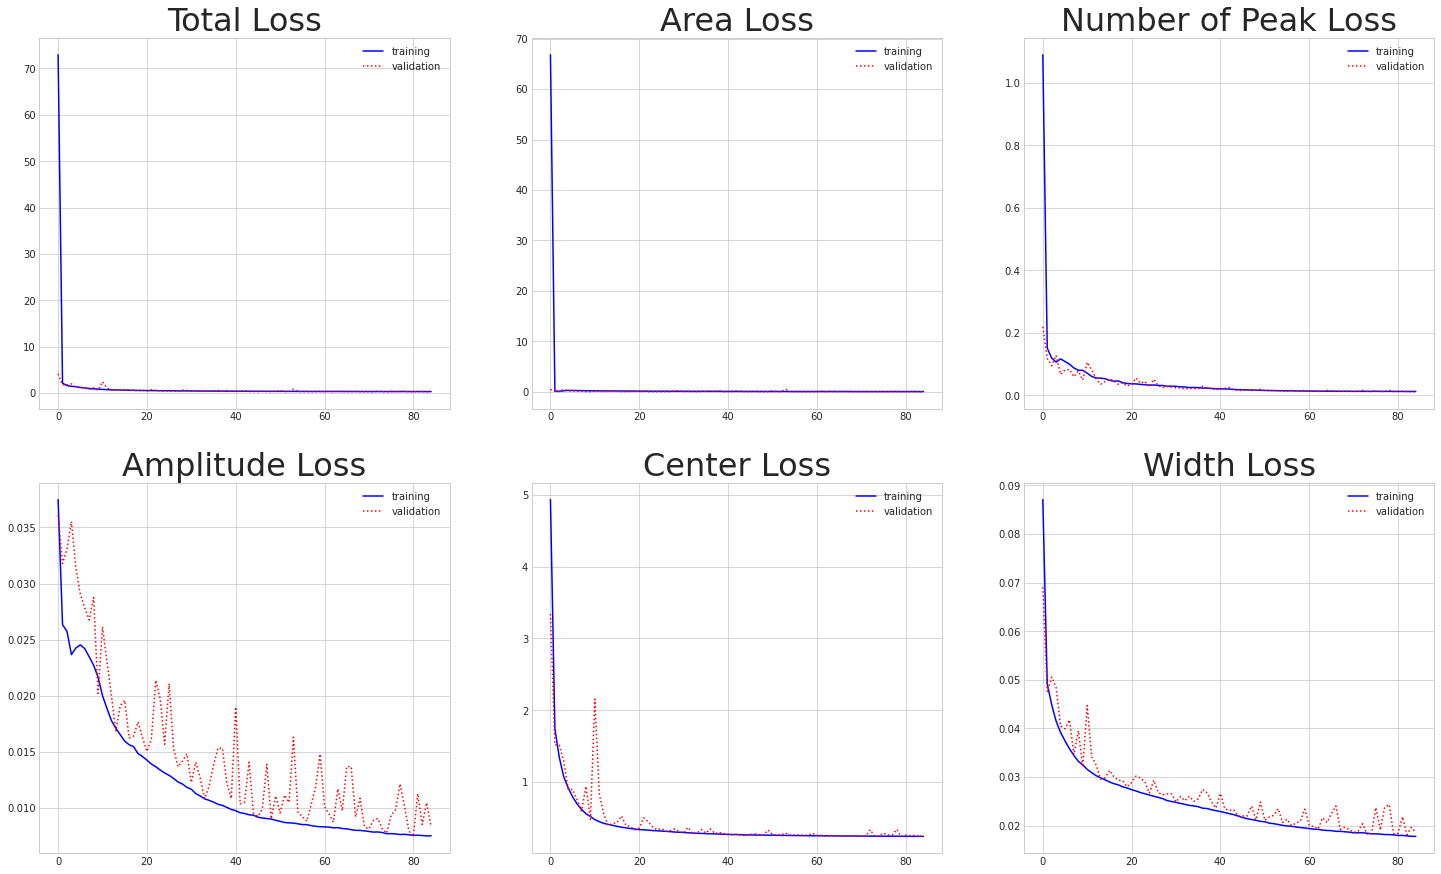

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(hist.history['loss'], 'b-', label = 'training')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()

plt.subplot(232)
plt.plot(hist.history['area_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_area_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Area Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(hist.history['num_peak_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_num_peak_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(hist.history['output_amp_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_amp_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Amplitude Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(hist.history['output_center_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_center_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Center Loss", size = 32)
plt.legend()

plt.subplot(236)
plt.plot(hist.history['output_width_loss'], 'b-', label = 'training')
plt.plot(hist.history['val_output_width_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Width Loss", size = 32)
plt.legend()



### Test data

In [ ]:
print(test_graph.shape)

(50000, 401, 1)


In [ ]:
prediction = model.predict(test_graph)
print(len(prediction))

5


In [ ]:
print(prediction[0].shape)  # area
print(prediction[1].shape)  # num_peak
print(prediction[2].shape)  # amplitude
print(prediction[3].shape)  # center
print(prediction[4].shape)  # width

(50000, 1)
(50000, 1)
(50000, 5)
(50000, 5)
(50000, 5)


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


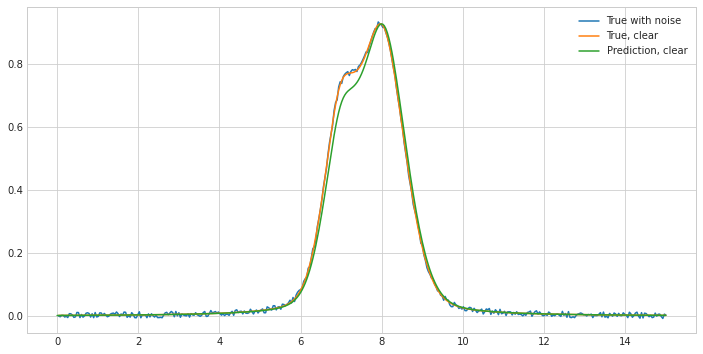

Predicted area: [52.98004]
     True area: 52.74812644001799
Predicted num_peak: [2.0280173]
     True num_peak: 2
Predicted amplitude: [ 0.4923585   0.8838487   0.01002864 -0.00118651  0.00381277]
     True amplitude: [0.55219801 0.87949117 0.         0.         0.        ]
Predicted center: [ 6.9748850e+00  8.0427418e+00  9.8174661e-03 -7.3439926e-03
  1.7232113e-02]
     True center: [6.95874129 8.01557301 0.         0.         0.        ]
Predicted width: [ 1.0061755e+00  1.3276830e+00 -8.5601211e-04  8.5963309e-03
  3.3895820e-03]
     True width: [0.99070752 1.32265249 0.         0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


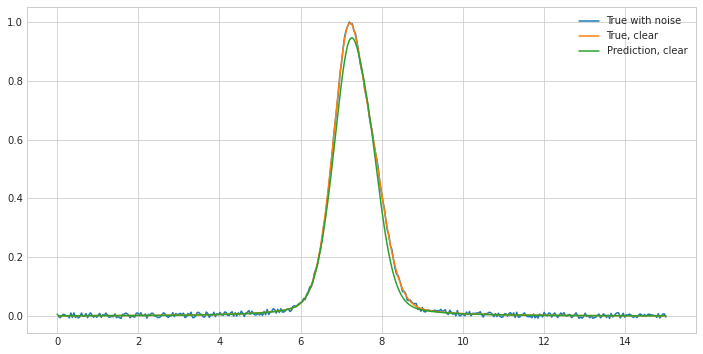

Predicted area: [35.215763]
     True area: 35.16781855822346
Predicted num_peak: [2.0361266]
     True num_peak: 2
Predicted amplitude: [0.8381698  0.29146934 0.00958488 0.00617278 0.00287319]
     True amplitude: [0.9177796  0.31732454 0.         0.         0.        ]
Predicted center: [ 7.1908479e+00  7.7284646e+00 -4.3455854e-02  2.5601536e-03
  2.2929125e-02]
     True center: [7.17350047 7.82978717 0.         0.         0.        ]
Predicted width: [ 0.9781414   0.8368648  -0.00640553  0.01443517 -0.00445797]
     True width: [0.93679758 0.86966314 0.         0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


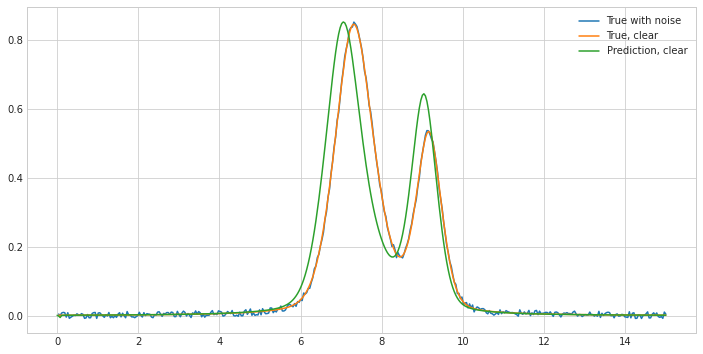

Predicted area: [42.015694]
     True area: 41.9723268278857
Predicted num_peak: [3.0366383]
     True num_peak: 3
Predicted amplitude: [ 8.3050263e-01  9.6794896e-02  6.2342787e-01 -9.4417073e-03
 -1.1507049e-04]
     True amplitude: [0.78567829 0.08793606 0.50862443 0.         0.        ]
Predicted center: [7.043321   7.9363823  9.0398035  0.06271006 0.03182245]
     True center: [7.29137782 7.85431031 9.16281478 0.         0.        ]
Predicted width: [ 1.0318825   1.0753711   0.7480387   0.03524938 -0.00195505]
     True width: [1.08820843 1.43528142 0.7399139  0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


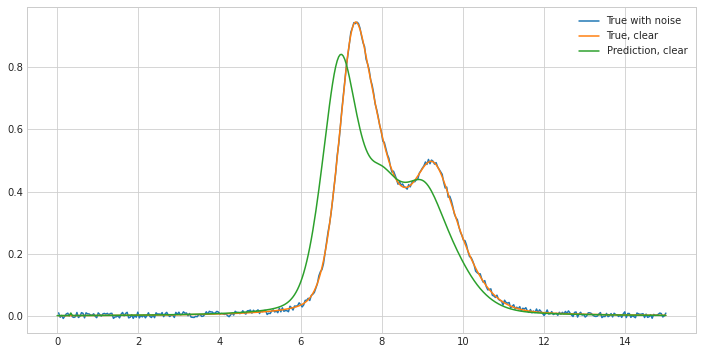

Predicted area: [55.878555]
     True area: 55.78797628717193
Predicted num_peak: [4.0976233]
     True num_peak: 4
Predicted amplitude: [0.78405863 0.32117212 0.36339974 0.06528971 0.00826869]
     True amplitude: [0.70564939 0.40353946 0.43221829 0.06883905 0.        ]
Predicted center: [6.9645023 7.985845  9.036783  9.981599  0.3402951]
     True center: [ 7.28379572  7.89898848  9.24848661 10.14587136  0.        ]
Predicted width: [1.0405412 1.1289822 1.3648586 1.3743232 0.0251   ]
     True width: [0.89490596 1.29814825 1.29471866 1.3544284  0.        ]


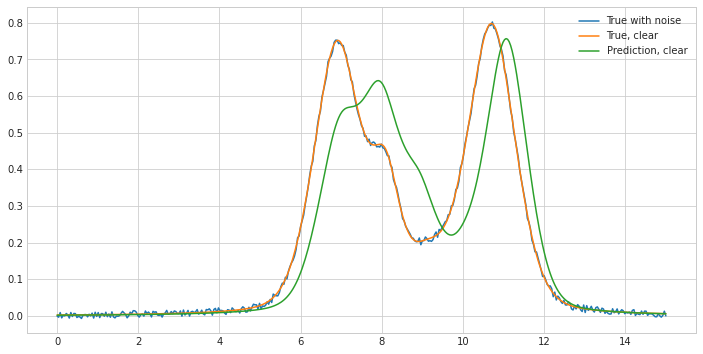

Predicted area: [78.11148]
     True area: 77.97866588736927
Predicted num_peak: [4.9932823]
     True num_peak: 5
Predicted amplitude: [0.46283484 0.5019294  0.27187958 0.10151665 0.73443824]
     True amplitude: [0.73505593 0.30554874 0.12182049 0.02609004 0.77913641]
Predicted center: [ 6.9536424  7.973862   8.9415865 10.02219   11.080297 ]
     True center: [ 6.90703436  8.10240198  9.08739012  9.90174487 10.71186954]
Predicted width: [1.2537712 1.1502023 1.1145036 1.108462  1.2145478]
     True width: [1.39263484 0.8411339  1.09818968 1.24725476 1.39842194]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


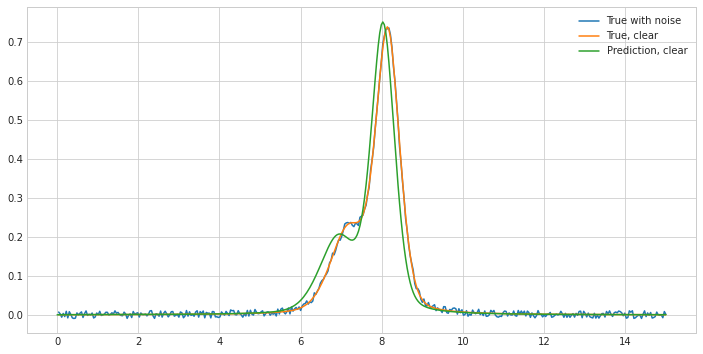

Predicted area: [22.524069]
     True area: 22.369717766943758
Predicted num_peak: [2.0475097]
     True num_peak: 2
Predicted amplitude: [ 0.1908479   0.7313281   0.01457453 -0.00400034  0.00223914]
     True amplitude: [0.21030332 0.71078914 0.         0.         0.        ]
Predicted center: [ 6.9291706   8.0314     -0.09565617  0.01066114  0.02936258]
     True center: [7.17434615 8.14729549 0.         0.         0.        ]
Predicted width: [ 1.1053506   0.6870596  -0.00837281  0.01028359  0.00335805]
     True width: [1.05101127 0.70394759 0.         0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


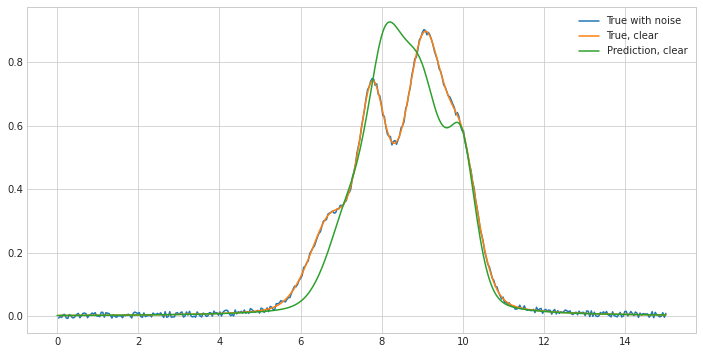

Predicted area: [70.52062]
     True area: 70.3992692600466
Predicted num_peak: [4.06076]
     True num_peak: 4
Predicted amplitude: [2.1994871e-01 7.0572734e-01 6.3310081e-01 4.3214861e-01 4.8125163e-04]
     True amplitude: [0.28048385 0.61079769 0.84520599 0.37915073 0.        ]
Predicted center: [7.0593314  8.054826   8.987995   9.981521   0.11108265]
     True center: [ 6.7335869   7.76275224  9.04936323 10.01567277  0.        ]
Predicted width: [1.1245326  1.1643364  1.2964293  0.8223423  0.01058933]
     True width: [1.23575019 0.84076549 1.26614238 0.92427775 0.        ]


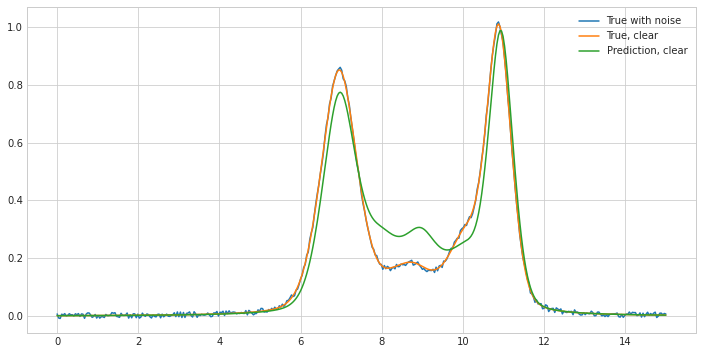

Predicted area: [63.73891]
     True area: 63.642491449232836
Predicted num_peak: [5.0029087]
     True num_peak: 5
Predicted amplitude: [0.7423175  0.20758347 0.24436283 0.18354212 0.94936055]
     True amplitude: [0.84294002 0.04366035 0.13297674 0.23164448 0.9649005 ]
Predicted center: [ 6.9575562  7.986943   8.965894  10.045814  10.937491 ]
     True center: [ 6.95141767  8.25036962  8.7942409  10.03686205 10.88607573]
Predicted width: [0.98921365 1.0804187  1.0797179  1.0466009  0.71849495]
     True width: [1.07671334 0.99035065 1.20798767 0.99440891 0.74294668]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


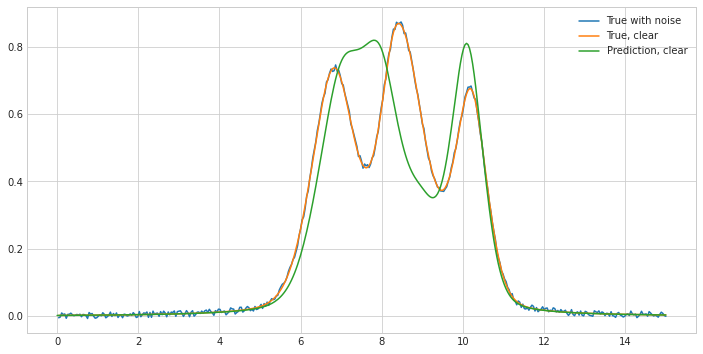

Predicted area: [79.32527]
     True area: 79.30954192096252
Predicted num_peak: [4.0468345]
     True num_peak: 4
Predicted amplitude: [0.64734674 0.6018807  0.22831136 0.7736157  0.00302421]
     True amplitude: [0.7113229  0.39088351 0.54674799 0.63028785 0.        ]
Predicted center: [ 6.9852576  7.9851456  9.003436  10.102207   0.124557 ]
     True center: [ 6.81795023  8.28282975  8.71101931 10.19516969  0.        ]
Predicted width: [1.3673958  1.1656249  1.0400487  0.9377545  0.00715479]
     True width: [1.31178239 0.84951015 1.31205911 0.93398654 0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


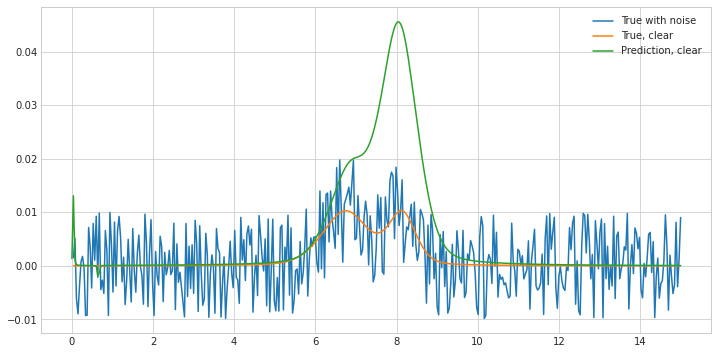

Predicted area: [0.746064]
     True area: 0.6590207638653246
Predicted num_peak: [1.9933699]
     True num_peak: 2
Predicted amplitude: [ 0.01691027  0.04406691 -0.00324846  0.01306377  0.00204941]
     True amplitude: [0.01015106 0.00943913 0.         0.         0.        ]
Predicted center: [6.8477654  8.062399   0.6535615  0.03640296 0.04780791]
     True center: [6.7455888  8.14125572 0.         0.         0.        ]
Predicted width: [1.1835455  1.0593028  0.03903306 0.03669295 0.0023693 ]
     True width: [1.36264057 0.79693447 0.         0.         0.        ]


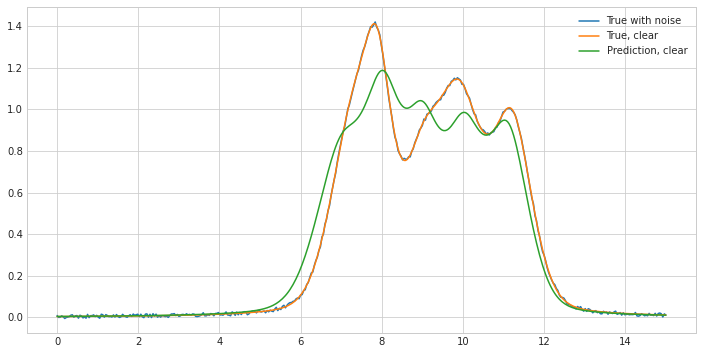

Predicted area: [147.48848]
     True area: 147.29279570126542
Predicted num_peak: [4.9907103]
     True num_peak: 5
Predicted amplitude: [0.76186347 0.8529441  0.78678566 0.7577226  0.8312354 ]
     True amplitude: [0.81883407 0.93136911 0.5966391  0.95341213 0.88034637]
Predicted center: [ 6.9998527  8.031817   8.997897  10.028414  11.11912  ]
     True center: [ 7.22286318  7.89442254  8.97766015  9.9287003  11.22064859]
Predicted width: [1.4324459 1.0662487 1.0995699 1.1223104 1.1904391]
     True width: [1.23611811 0.86081246 1.15420786 1.31940624 1.15857332]


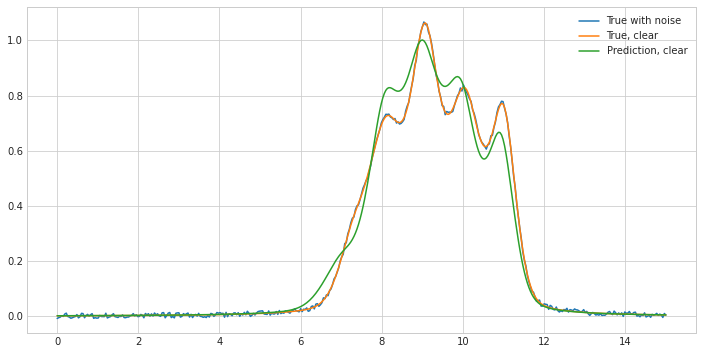

Predicted area: [87.07297]
     True area: 86.73305881172263
Predicted num_peak: [4.9995027]
     True num_peak: 5
Predicted amplitude: [0.16754293 0.6674764  0.8414309  0.7262994  0.56825924]
     True amplitude: [0.18491286 0.64840807 0.87653888 0.7486505  0.66282192]
Predicted center: [ 7.0138907  8.066442   8.990534   9.955192  10.941723 ]
     True center: [ 7.2652066   8.10857472  9.06871644 10.04732534 11.00459545]
Predicted width: [1.0443865 0.9513335 1.0135258 1.0009329 0.7616415]
     True width: [0.8141044  1.09703454 0.81253373 1.00962684 0.71519184]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


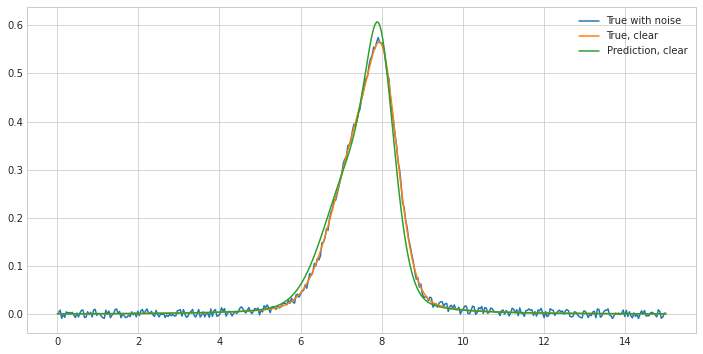

Predicted area: [24.959856]
     True area: 24.89274274188433
Predicted num_peak: [2.038918]
     True num_peak: 2
Predicted amplitude: [ 0.25043094  0.50048095  0.00950828  0.00163706 -0.00163043]
     True amplitude: [0.28655805 0.42925096 0.         0.         0.        ]
Predicted center: [ 7.109045    7.938248   -0.04785539  0.01343752  0.0231161 ]
     True center: [7.26117198 8.01885033 0.         0.         0.        ]
Predicted width: [ 1.4522902   0.8964956  -0.02928382  0.01342833  0.00554635]
     True width: [1.39762891 0.94606874 0.         0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


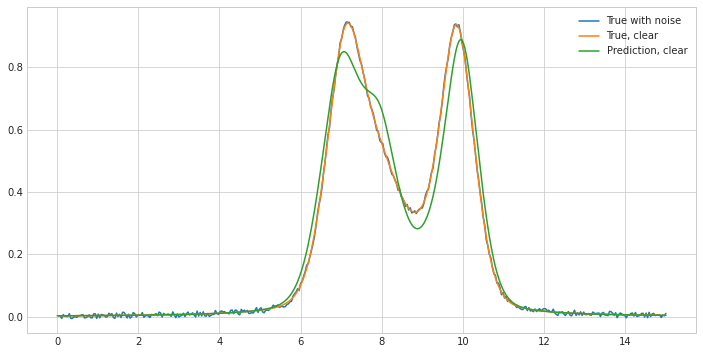

Predicted area: [75.421196]
     True area: 75.27058402868593
Predicted num_peak: [4.0291066]
     True num_peak: 4
Predicted amplitude: [0.75378335 0.52520865 0.12359566 0.8423734  0.00397468]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


     True amplitude: [0.80319537 0.37745784 0.05726393 0.90392227 0.        ]
Predicted center: [6.9806194  7.957398   9.0911875  9.964193   0.02612384]
     True center: [7.10055754 8.05556458 8.9663229  9.85203486 0.        ]
Predicted width: [ 1.154555    1.1089858   1.1931834   1.0024579  -0.01203883]
     True width: [1.12635125 1.47695178 0.95179247 1.02164188 0.        ]


<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


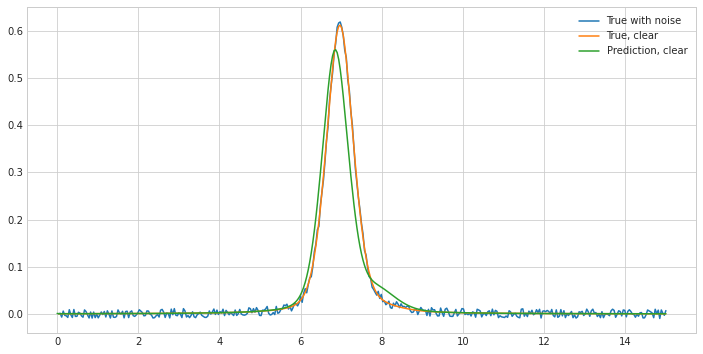

Predicted area: [15.413336]
     True area: 15.282608772989466
Predicted num_peak: [2.0307941]
     True num_peak: 2
Predicted amplitude: [ 0.5551988   0.04217022  0.00963279 -0.00745534  0.01215995]
     True amplitude: [0.61066803 0.00792456 0.         0.         0.        ]
Predicted center: [ 6.8514276e+00  7.9006543e+00 -2.1745697e-02 -1.6320452e-02
 -1.8797889e-03]
     True center: [6.9665541 7.9661101 0.        0.        0.       ]
Predicted width: [0.7830741  1.0872611  0.02055141 0.01691529 0.00164965]
     True width: [0.79172071 1.17185542 0.         0.         0.        ]


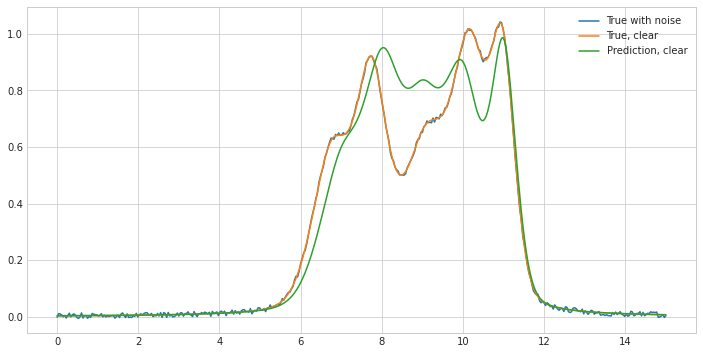

<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


Predicted area: [109.74948]
     True area: 109.56920447742372
Predicted num_peak: [4.997783]
     True num_peak: 5
Predicted amplitude: [0.48360705 0.75221753 0.6029632  0.76464635 0.8571492 ]
     True amplitude: [0.55352903 0.76969445 0.58828464 0.83823732 0.84533896]
Predicted center: [ 6.999536  8.021802  9.015346 10.004597 11.010927]
     True center: [ 6.76940852  7.7507581   9.0997289  10.17281804 10.9821438 ]
Predicted width: [1.264418   1.1122336  1.1304511  1.1132637  0.72134215]
     True width: [1.12975304 0.90886649 1.33990028 0.98342145 0.72157832]


<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


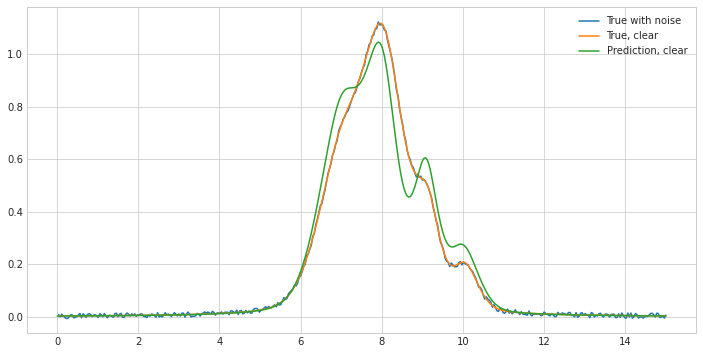

Predicted area: [72.043915]
     True area: 71.90571900275636
Predicted num_peak: [4.023819]
     True num_peak: 4
Predicted amplitude: [ 0.77780545  0.8278379   0.5194146   0.23609723 -0.00585717]
     True amplitude: [0.55157756 0.98234406 0.32753702 0.16557734 0.        ]
Predicted center: [ 7.0296736   8.004778    9.084449   10.004273    0.02875321]
     True center: [ 6.98223788  8.03998847  9.13739393 10.05096118  0.        ]
Predicted width: [ 1.3082309e+00  9.3063349e-01  7.0024943e-01  8.8277423e-01
 -3.2384694e-04]
     True width: [1.3521741  1.25257644 0.70649527 0.74681812 0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


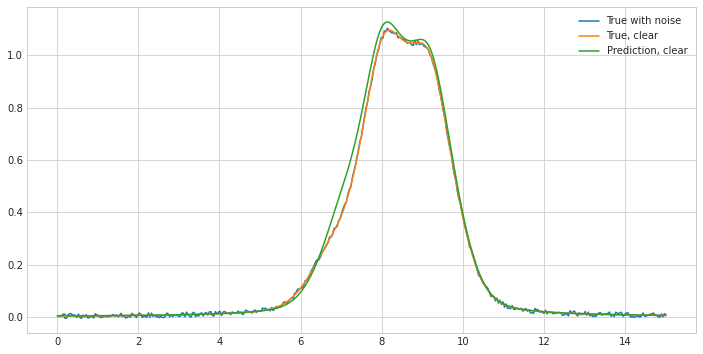

<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


Predicted area: [82.728195]
     True area: 82.5862330704606
Predicted num_peak: [3.0346494]
     True num_peak: 3
Predicted amplitude: [0.2551992  0.9075055  0.88738793 0.00829643 0.00534959]
     True amplitude: [0.17848071 0.88909961 0.86207138 0.         0.        ]
Predicted center: [6.939182   8.010459   9.191415   0.17888595 0.0342926 ]
     True center: [6.70732402 8.01096289 9.18293196 0.         0.        ]
Predicted width: [ 1.2643596   1.3361571   1.4322221   0.04160795 -0.00411834]
     True width: [1.27816056 1.36420323 1.44339699 0.         0.        ]


<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


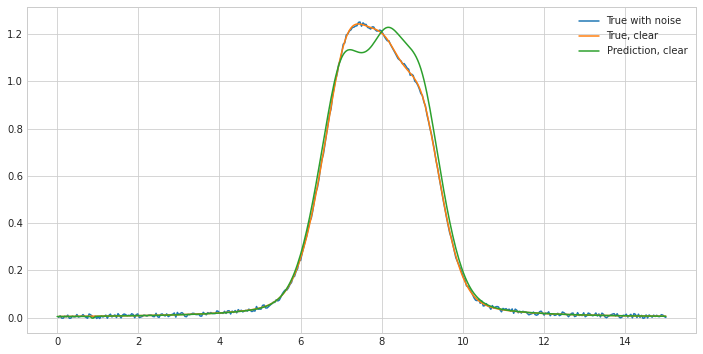

Predicted area: [100.864235]
     True area: 100.82504454105526
Predicted num_peak: [3.1052241]
     True num_peak: 3
Predicted amplitude: [ 0.945277    0.82330024  0.76509804 -0.00924568  0.01273574]
     True amplitude: [0.94695832 0.74641229 0.64908153 0.         0.        ]
Predicted center: [7.0054555  8.112534   9.000475   0.8777201  0.01847898]
     True center: [7.10429106 8.08779257 9.01834723 0.         0.        ]
Predicted width: [1.3945477  1.2994708  1.2774419  0.07795659 0.00416896]
     True width: [1.48201489 1.43589822 1.23691124 0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


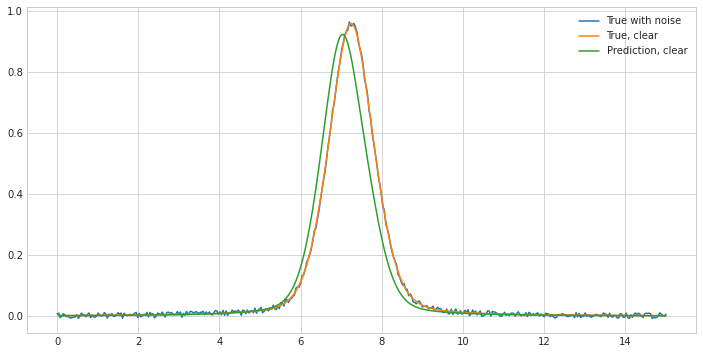

Predicted area: [39.035435]
     True area: 38.96707990136095
Predicted num_peak: [2.0338173]
     True num_peak: 2
Predicted amplitude: [ 0.9033061   0.0932465  -0.00257065  0.00704619  0.0030125 ]
     True amplitude: [0.95928009 0.00335997 0.         0.         0.        ]
Predicted center: [ 7.0172482e+00  7.7726860e+00 -5.6020036e-02 -5.7195127e-04
  2.2284441e-02]
     True center: [7.24448874 8.2387104  0.         0.         0.        ]
Predicted width: [ 1.2232943e+00  9.7787952e-01 -1.8012434e-02  1.5077472e-02
 -9.4988942e-04]
     True width: [1.31383948 1.40615887 0.         0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


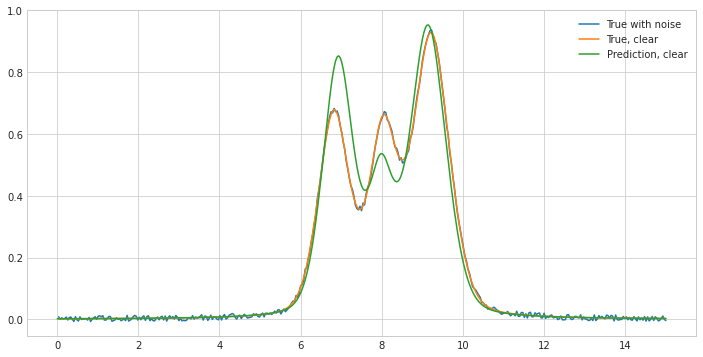

Predicted area: [63.256752]
     True area: 63.168033979958786
Predicted num_peak: [3.0402012]
     True num_peak: 3
Predicted amplitude: [ 0.8293507   0.4203363   0.9365586  -0.00485548  0.01091547]
     True amplitude: [0.65376679 0.57643568 0.9076479  0.         0.        ]
Predicted center: [6.925954   7.980718   9.139162   0.03847362 0.03630541]
     True center: [6.82092473 8.0328883  9.2191281  0.         0.        ]
Predicted width: [9.1002142e-01 7.1900678e-01 1.0691861e+00 2.5296211e-04 5.7470798e-04]
     True width: [0.91854971 0.81115547 1.07309463 0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


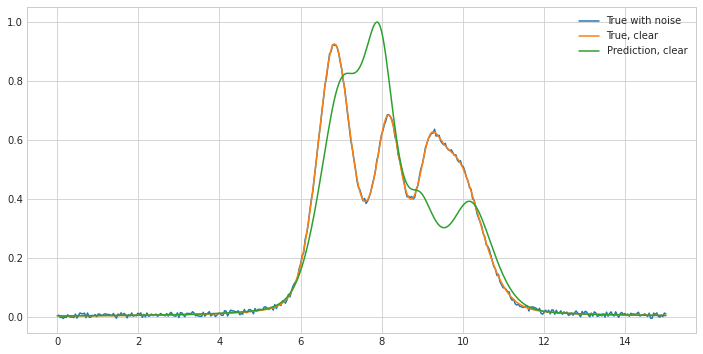

Predicted area: [72.20518]
     True area: 72.1579137272289
Predicted num_peak: [4.0502462]
     True num_peak: 4
Predicted amplitude: [ 0.7337752   0.80044     0.3037563   0.36701295 -0.01117997]
     True amplitude: [0.90396067 0.61587668 0.3310588  0.48694215 0.        ]
Predicted center: [ 6.995991    7.9523373   8.942702   10.179064    0.17065796]
     True center: [6.82885091 8.16279549 9.16749019 9.86481694 0.        ]
Predicted width: [1.2382991  0.9125757  0.8887043  1.3093971  0.02092662]
     True width: [1.01098879 0.8128298  0.7138752  1.40728418 0.        ]


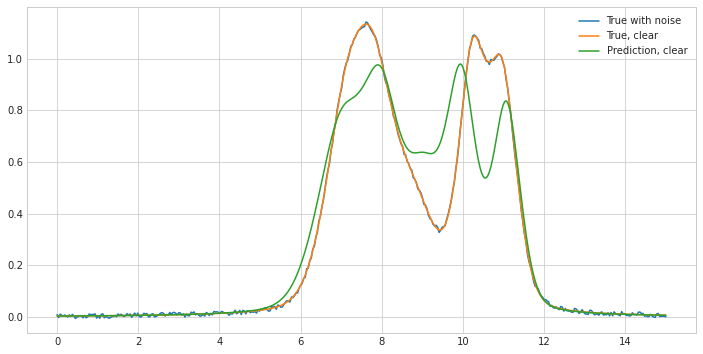

Predicted area: [112.757866]
     True area: 112.63922278465691
Predicted num_peak: [4.995242]
     True num_peak: 5
Predicted amplitude: [0.68823725 0.7319603  0.46416    0.8494382  0.78341204]
     True amplitude: [0.56573699 0.80542518 0.33570751 0.88897714 0.87885205]
Predicted center: [ 6.979026   7.9864173  9.041548   9.96733   11.073259 ]
     True center: [ 7.05811811  7.77163991  8.83856628 10.22192968 10.96938974]
Predicted width: [1.3725657  1.0999486  1.1094936  0.8698604  0.80479836]
     True width: [1.21734747 1.301141   1.3978012  0.77835065 0.85625735]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


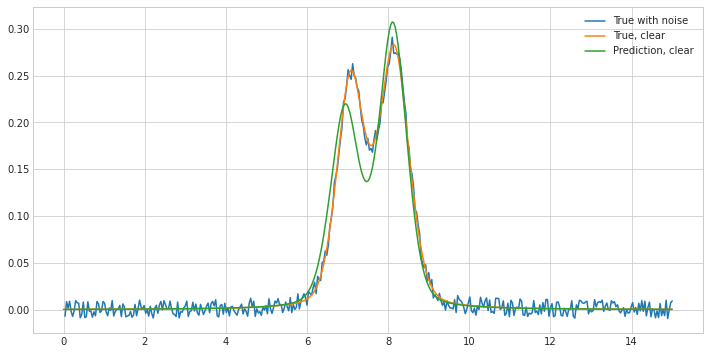

Predicted area: [13.675904]
     True area: 13.577049221860808
Predicted num_peak: [2.0428276]
     True num_peak: 2
Predicted amplitude: [ 0.2112179   0.3005662   0.00812741 -0.00105112 -0.00451107]
     True amplitude: [0.24228366 0.27428769 0.         0.         0.        ]
Predicted center: [ 6.938708    8.116406   -0.00940014  0.01005127  0.02988716]
     True center: [7.07608265 8.1457735  0.         0.         0.        ]
Predicted width: [0.8571769  0.82335603 0.00191462 0.00579238 0.00274934]
     True width: [0.81125259 0.88052785 0.         0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


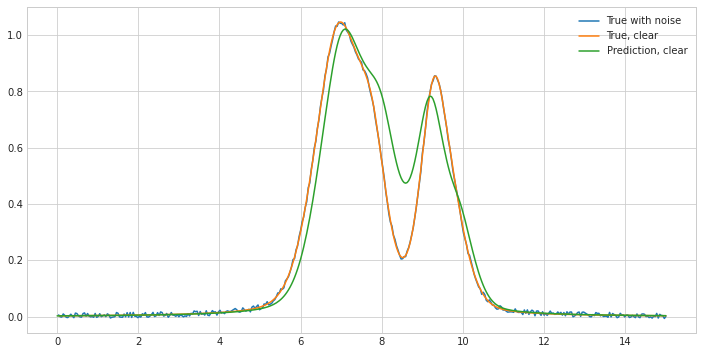

Predicted area: [77.461685]
     True area: 77.15971526085684
Predicted num_peak: [4.020451]
     True num_peak: 4
Predicted amplitude: [ 0.93087643  0.5541129   0.68906057  0.27625775 -0.00190827]
     True amplitude: [0.99334116 0.41139185 0.7411177  0.22402926 0.        ]
Predicted center: [7.0149093 7.9975667 9.192157  9.936232  0.0141325]
     True center: [6.92055503 7.77200559 9.28412698 9.81776098 0.        ]
Predicted width: [ 1.2914141   1.074649    0.8540921   0.8318232  -0.01185107]
     True width: [1.35915024 0.86301785 0.80126715 0.89365841 0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


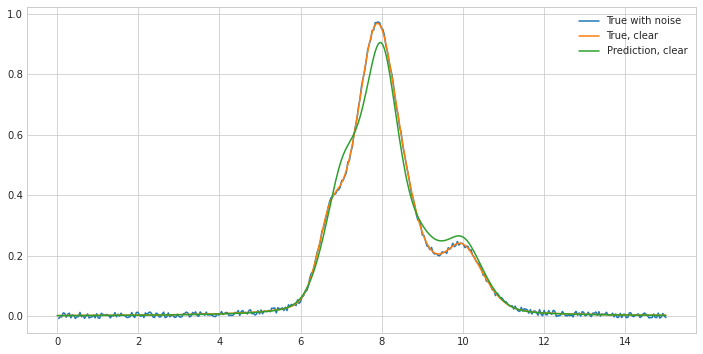

Predicted area: [54.76027]
     True area: 54.58979764101574
Predicted num_peak: [4.0374126]
     True num_peak: 4
Predicted amplitude: [ 0.41606486  0.81587434  0.16865027  0.2241055  -0.00557804]
     True amplitude: [0.23280617 0.94503954 0.0824694  0.21193014 0.        ]
Predicted center: [ 7.031756    7.988898    8.969966   10.006704    0.08837271]
     True center: [6.712212   7.88403747 8.79560014 9.97286802 0.        ]
Predicted width: [1.0624702  1.0396364  1.128979   1.2011833  0.00448889]
     True width: [0.74911251 1.31791968 1.08251559 1.23572825 0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


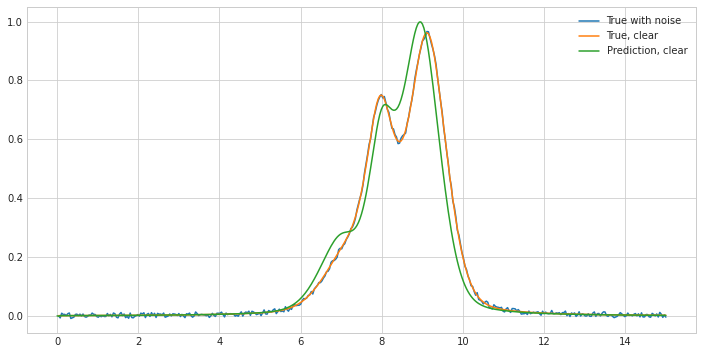

Predicted area: [55.310997]
     True area: 55.380816508319015
Predicted num_peak: [3.0251336]
     True num_peak: 3
Predicted amplitude: [ 2.4393332e-01  5.0931352e-01  9.7197640e-01 -4.0111430e-03
 -2.7194619e-07]
     True amplitude: [0.19677094 0.58935914 0.93869553 0.         0.        ]
Predicted center: [7.001246   7.9974866  8.961015   0.02357079 0.0310164 ]
     True center: [7.17121184 7.96696632 9.12113657 0.         0.        ]
Predicted width: [ 1.2521553   0.7556834   1.0992953   0.02732873 -0.00533096]
     True width: [1.39678812 0.80393201 1.11247892 0.         0.        ]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


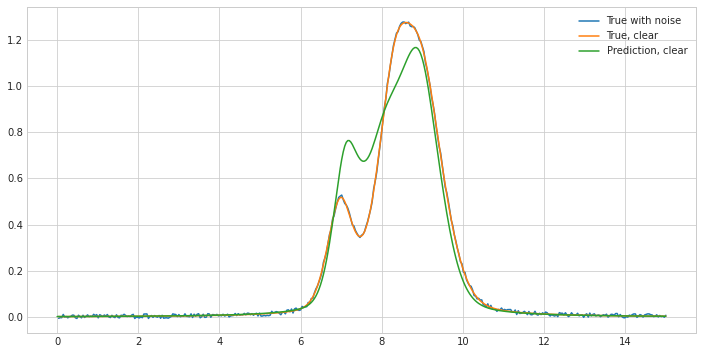

Predicted area: [72.11667]
     True area: 72.09643605812853
Predicted num_peak: [3.049777]
     True num_peak: 3
Predicted amplitude: [0.57369095 0.63826096 0.9885502  0.01422156 0.01178525]
     True amplitude: [0.46437439 0.79577621 0.92863086 0.         0.        ]
Predicted center: [7.10541    8.023513   8.945322   0.08648254 0.02617536]
     True center: [6.97708618 8.29524323 9.01704487 0.         0.        ]
Predicted width: [ 0.7320884   1.2321266   1.1845769  -0.00204799  0.00936788]
     True width: [0.75145675 1.03777576 1.24918991 0.         0.        ]


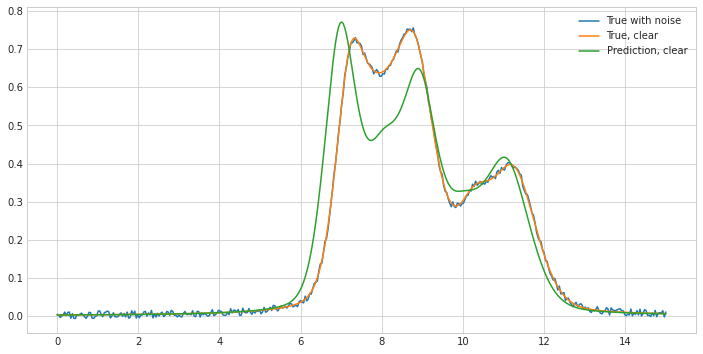

Predicted area: [73.933945]
     True area: 73.83151661407284
Predicted num_peak: [4.998344]
     True num_peak: 5
Predicted amplitude: [0.7150434  0.3563791  0.5443946  0.19573812 0.38093773]
     True amplitude: [0.47582018 0.40393667 0.6016394  0.2172598  0.35388424]
Predicted center: [ 6.9789286  8.01734    8.938625   9.9938    11.075978 ]
     True center: [ 7.21115224  7.87947337  8.82793324 10.25464145 11.26062342]
Predicted width: [0.9289807 1.101977  1.03394   1.1185385 1.33863  ]
     True width: [0.85340974 1.36985585 1.22896679 1.06520373 1.31857102]


<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:12: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: divide by zero encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))
<ipython-input-19-6db176f27ce6>:30: RuntimeWarning: invalid value encountered in true_divide
  result += amp[i] * ( (0.7*np.exp(-np.log(2)*(x - center[i])**2 / (beta * width[i])**2)) + (0.3/(1 + (x - center[i])**2 / (gamma * width[i])**2)))


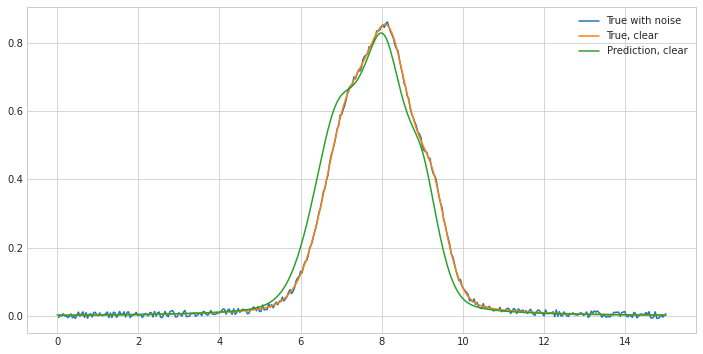

Predicted area: [59.31152]
     True area: 59.299739004426804
Predicted num_peak: [3.0222282]
     True num_peak: 3
Predicted amplitude: [ 0.53316426  0.69237506  0.31156453  0.00124453 -0.0009536 ]
     True amplitude: [0.45511465 0.7412724  0.23754502 0.         0.        ]
Predicted center: [6.8892808e+00 8.0490208e+00 9.0127897e+00 4.1926056e-03 2.4952523e-02]
     True center: [7.06842357 8.18419506 9.26442698 0.         0.        ]
Predicted width: [ 1.4285566   1.2506862   0.9701221   0.02480695 -0.00192897]
     True width: [1.40339378 1.451295   0.89461516 0.         0.        ]


In [ ]:
for i in range(30):
    
    test_amp[i] = np.array(test_amp[i])
    test_center[i] = np.array(test_center[i])
    test_width[i] = np.array(test_width[i])
    
    test_params = np.stack((test_amp[i], test_center[i], test_width[i]))
    test_params = test_params.T.reshape(3*N)
    test_params = list(test_params)
    
    #########################################################
    prediction[2][i] = np.array(prediction[2][i])
    prediction[3][i] = np.array(prediction[3][i])
    prediction[4][i] = np.array(prediction[4][i])
    
    predict_params = np.stack((prediction[2][i], prediction[3][i], prediction[4][i]))
    predict_params = predict_params.T.reshape(3*N)
    predict_params = list(predict_params)
    
    ########################################################
    print('======================================================================')
    plt.figure(figsize = (12, 6))
    plt.plot(x, voigt_noise(x, *test_params), label = 'True with noise')
    plt.plot(x, voigt(x, *test_params), label = 'True, clear')
    plt.plot(x, voigt(x, *predict_params), label = 'Prediction, clear')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    print("Predicted area:", prediction[0][i])
    print("     True area:", test_area[i])

    print("Predicted num_peak:", prediction[1][i])
    print("     True num_peak:", test_num_peak[i])

    print("Predicted amplitude:", prediction[2][i])
    print("     True amplitude:", test_amp[i] )

    print("Predicted center:", prediction[3][i])
    print("     True center:", test_center[i])

    print("Predicted width:", prediction[4][i])
    print("     True width:", test_width[i])
    print('======================================================================')
    
    

# Real XPS data fitting

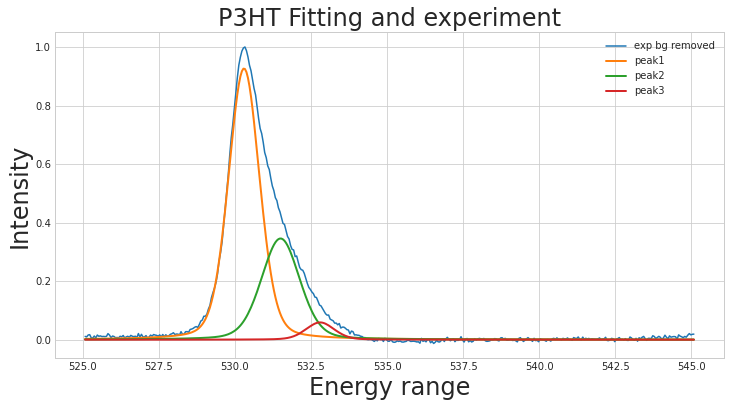

In [ ]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()


In [ ]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [ ]:
predict = model.predict(test_result)
print(predict)


[array([[39.263237]], dtype=float32), array([[4.9867873]], dtype=float32), array([[ 0.10164864, -0.12567028,  0.22307298,  0.35677472,  0.7589722 ]],
      dtype=float32), array([[ 6.9745197,  7.970715 ,  9.0050745, 10.071141 , 10.884266 ]],
      dtype=float32), array([[0.9852375, 1.0409338, 0.9470625, 1.0218616, 0.9127321]],
      dtype=float32)]


In [ ]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [ ]:
new_predict

[array([39.263237], dtype=float32),
 array([4.9867873], dtype=float32),
 array([ 0.10164864, -0.12567028,  0.22307298,  0.35677472,  0.7589722 ],
       dtype=float32),
 array([ 6.9745197,  7.970715 ,  9.0050745, 10.071141 , 10.884266 ],
       dtype=float32),
 array([0.9852375, 1.0409338, 0.9470625, 1.0218616, 0.9127321],
       dtype=float32)]

In [ ]:
print(new_predict[0].shape)  # area
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
print(new_predict[4].shape)  # width

(1,)
(1,)
(5,)
(5,)
(5,)


In [ ]:
peak_1 = [new_predict[2][0], new_predict[3][0], new_predict[4][0]]
peak_2 = [new_predict[2][1], new_predict[3][1], new_predict[4][1]]
peak_3 = [new_predict[2][2], new_predict[3][2], new_predict[4][2]]
peak_4 = [new_predict[2][3], new_predict[3][3], new_predict[4][3]]
peak_5 = [new_predict[2][4], new_predict[3][4], new_predict[4][4]]
predict_params = peak_1 + peak_2 + peak_3

# 비교

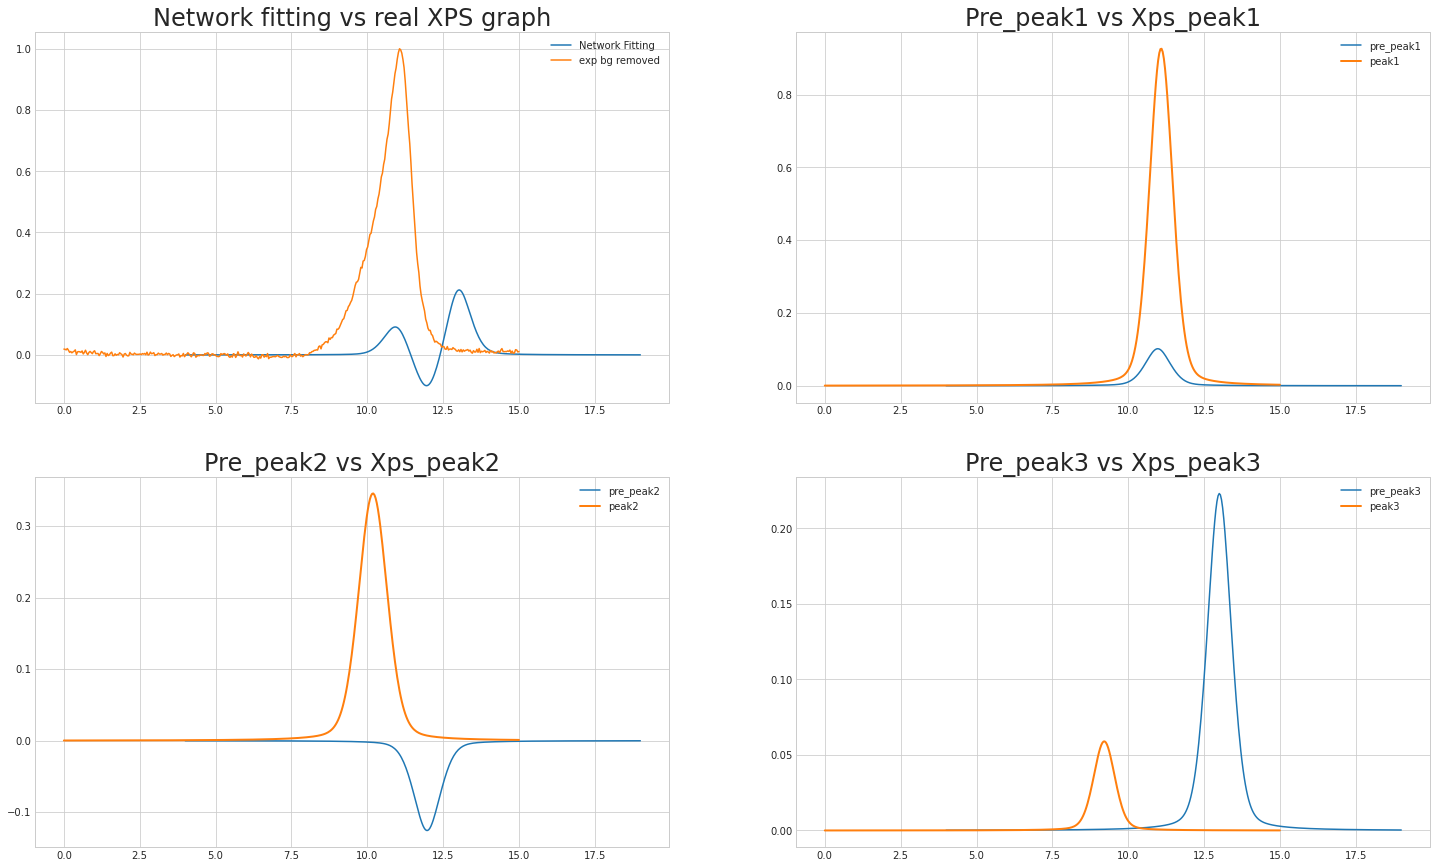

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x+4, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x+4, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x+4, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


plt.subplot(224)
plt.plot(x+4, voigt(x, *predict_params[6:]), label = 'pre_peak3')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()
plt.show()




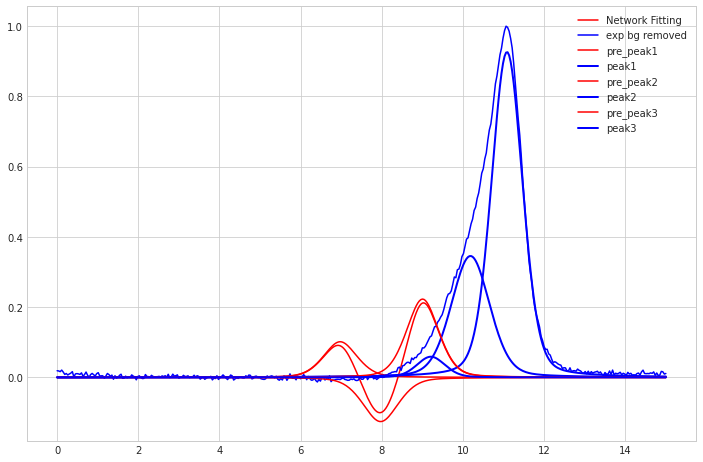

In [ ]:
plt.figure(figsize = (12, 8))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')


plt.plot(x, voigt(x, *predict_params[:3]), label = 'pre_peak1',  color = 'red')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color = 'blue')


plt.plot(x, voigt(x, *predict_params[3:6]), label = 'pre_peak2',  color = 'red')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2, color = 'blue')

plt.plot(x, voigt(x, *predict_params[6:]), label = 'pre_peak3',  color = 'red')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2, color = 'blue')

plt.legend()
plt.show()



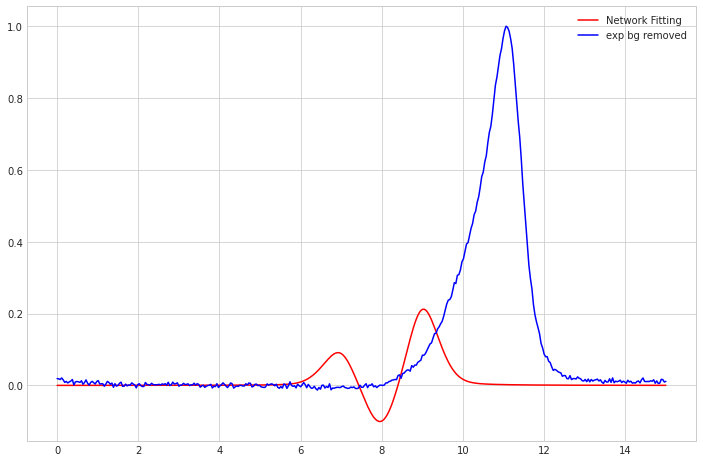

In [ ]:
plt.figure(figsize = (12, 8))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting', color = 'red')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",  color = 'blue')

plt.legend()
plt.show()



In [ ]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

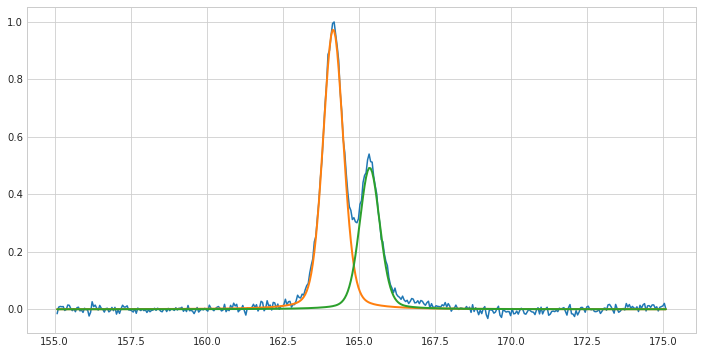

In [ ]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)


In [ ]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [ ]:
predict = model.predict(test_result)
print(predict)

[array([[27.956167]], dtype=float32), array([[2.8385613]], dtype=float32), array([[0.67646295, 0.6868734 , 0.03683354, 0.02856069, 0.05066804]],
      dtype=float32), array([[6.809514 , 8.212437 , 8.480895 , 1.8019806, 0.2103863]],
      dtype=float32), array([[0.26450583, 0.5794909 , 0.85278904, 0.16633517, 0.04327515]],
      dtype=float32)]


In [ ]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [ ]:
new_predict

[array([27.956167], dtype=float32),
 array([2.8385613], dtype=float32),
 array([0.67646295, 0.6868734 , 0.03683354, 0.02856069, 0.05066804],
       dtype=float32),
 array([6.809514 , 8.212437 , 8.480895 , 1.8019806, 0.2103863],
       dtype=float32),
 array([0.26450583, 0.5794909 , 0.85278904, 0.16633517, 0.04327515],
       dtype=float32)]

In [ ]:
print(new_predict[0].shape)  # area
print(new_predict[1].shape)  # num_peak
print(new_predict[2].shape)  # amplitude
print(new_predict[3].shape)  # center
print(new_predict[4].shape)  # width

(1,)
(1,)
(5,)
(5,)
(5,)


In [ ]:
peak_1 = [new_predict[2][0], new_predict[3][0], new_predict[4][0]]
peak_2 = [new_predict[2][1], new_predict[3][1], new_predict[4][1]]
peak_3 = [new_predict[2][2], new_predict[3][2], new_predict[4][2]]
peak_4 = [new_predict[2][3], new_predict[3][3], new_predict[4][3]]
peak_5 = [new_predict[2][4], new_predict[3][4], new_predict[4][4]]

predict_params = peak_1 + peak_2 + peak_3

In [ ]:
predict_params

[0.67646295,
 6.809514,
 0.26450583,
 0.6868734,
 8.212437,
 0.5794909,
 0.03683354,
 8.480895,
 0.85278904]

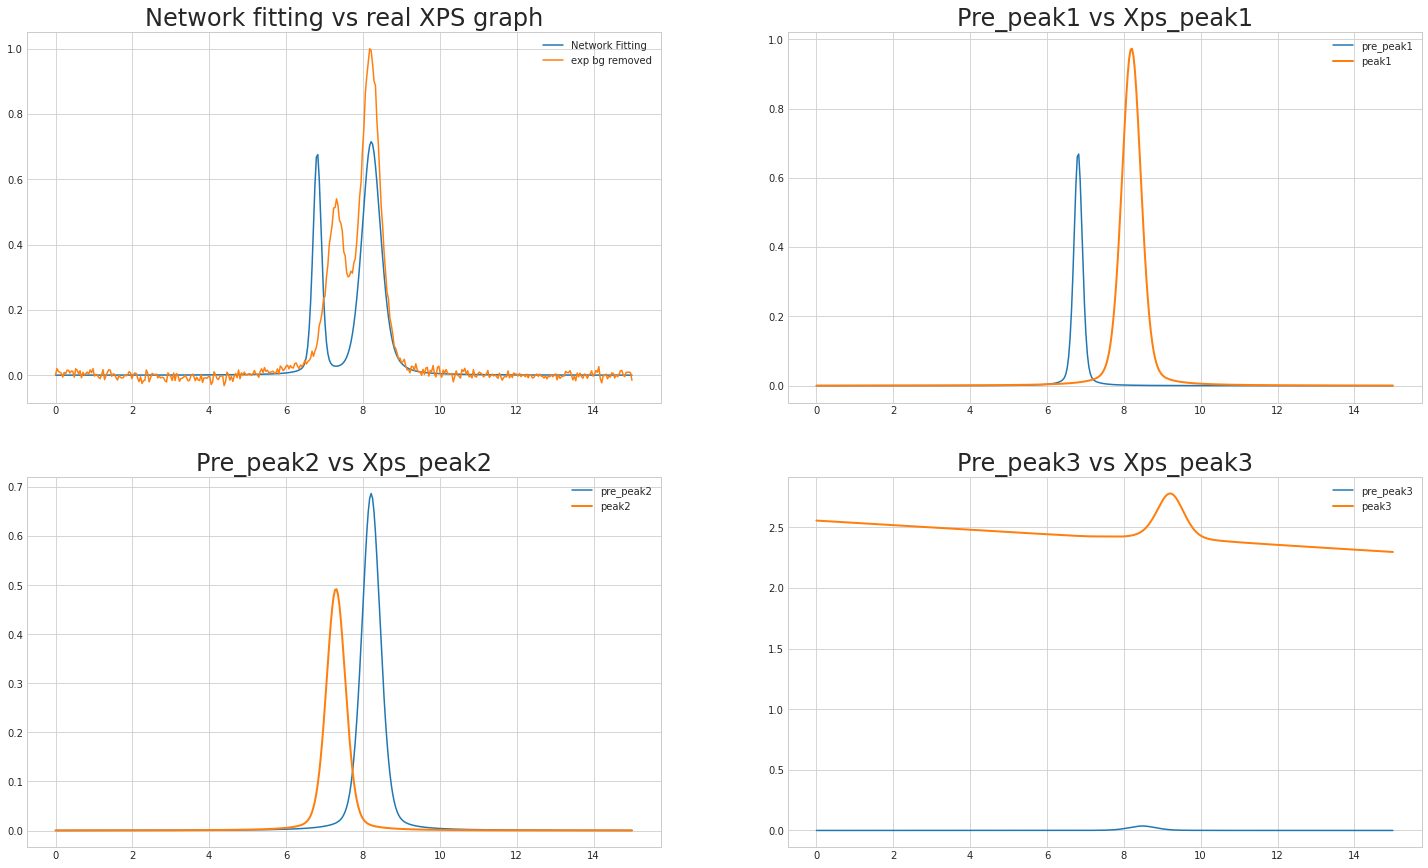

In [ ]:
plt.figure(figsize = (25, 15))

plt.subplot(221)
plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()


plt.subplot(222)
plt.plot(x, voigt(x, *predict_params[:3]), label = 'pre_peak1')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()


plt.subplot(223)
plt.plot(x, voigt(x, *predict_params[3:6]), label = 'pre_peak2')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()


plt.subplot(224)
plt.plot(x, voigt(x, *predict_params[6:9]), label = 'pre_peak3')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()
plt.show()



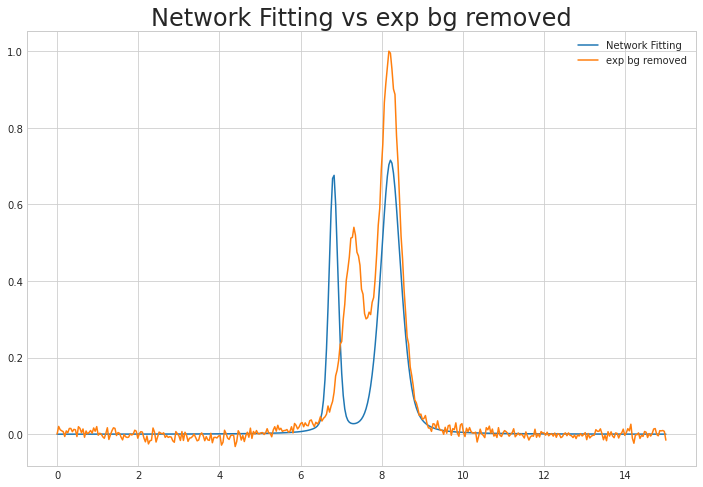

In [ ]:
plt.figure(figsize = (12, 8))

plt.plot(x, voigt(x, *predict_params), label = 'Network Fitting')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

plt.title("Network Fitting vs exp bg removed", size = 24)
plt.legend()
plt.show()


